In [2]:
#Stack Overflow Developer Survey Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df0= pd.read_csv("survey_data.csv")

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)


In [5]:
#Exploring Data

In [6]:
# Display the first few rows of the dataset
df0.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [7]:
df0.shape

(65457, 114)

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [9]:
df=df0.copy()

In [10]:
#Data Wrangling

In [11]:
#Identify and Remove Inconsistencies
# Identify unique Country values
pd.set_option('display.max_rows', None)
country_counts = df['Country'].value_counts()
print(f"Total unique countries: {len(country_counts)}")
print("\nTop 20 countries:")
print(country_counts.head(20))

Total unique countries: 185

Top 20 countries:
Country
United States of America                                11099
Germany                                                  4949
India                                                    4232
United Kingdom of Great Britain and Northern Ireland     3227
Ukraine                                                  2672
France                                                   2110
Canada                                                   2106
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Switzerland    

In [12]:
#Standardize entries 
# Examine EdLevel values
print("EdLevel value counts:")
print(df['EdLevel'].value_counts())

# Standardize EdLevel (example: map similar values to consistent format)
edlevel_mapping = {
    "Some college/university study without earning a degree": "Some college/university",
    "Bachelor's degree (B.A., B.S., B.Eng., etc.)": "Bachelor's degree",
    "Master's degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's degree",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctoral degree"
}
# Note: This is an example mapping - adjust based on your specific standardization needs
df['EdLevel'] = df['EdLevel'].map(edlevel_mapping).fillna(df['EdLevel'])
print("\nAfter standardization:")
print(df['EdLevel'].value_counts().head(10))


EdLevel value counts:
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15560
Some college/university study without earning a degree                                 7656
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5795
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2972
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1148
Something else                                                                          932
Name: count, dtype: int64

After standardization:
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                     

In [13]:
#Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder
#One-Hot Encode Employment column
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_array = encoder.fit_transform(df[['Employment']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Employment']))
df = pd.concat([df, encoded_df], axis=1)
print("Original Employment values:", df['Employment'].value_counts().head())
print(f"\nAdded {len(encoded_df.columns)} one-hot encoded columns for Employment")
#print("New columns:", encoded_df.columns.tolist())

Original Employment values: Employment
Employed, full-time                                                         39051
Independent contractor, freelancer, or self-employed                         4847
Student, full-time                                                           4713
Employed, full-time;Independent contractor, freelancer, or self-employed     3558
Not employed, but looking for work                                           2341
Name: count, dtype: int64

Added 109 one-hot encoded columns for Employment


In [14]:
#Finding duplicates
df.duplicated().sum()

20

In [15]:
#Finding duplicates with first seen
df.duplicated(keep=False).sum()

40

In [16]:
#each duplicate repeat once
40-20

20

In [17]:
# Choose a reasonable subset for potential duplicates
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']
dups_by_subset = df[df.duplicated(subset=subset_cols)]
print(f"Rows duplicated by subset {subset_cols}: {len(dups_by_subset)}")

Rows duplicated by subset ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']: 53316


In [18]:
dups_by_subset.describe(include='object')

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,53316,53316,53316,46015,53316,45676,49161,48922,39721,33245,48419,43756,48134,41034,40972,38969,37407,37585,47460,40248,48412,45197,41314,40844,34514,31273,34743,28270,25754,36683,31278,28438,17462,13820,13165,31985,26712,24056,42828,37572,35921,46663,42207,41151,46964,43073,39788,32160,30723,45147,37891,36196,35672,29375,28481,48712,48255,48276,36557,47742,47911,49270,37041,29838,30160,29918,28315,24915,20029,10564,10102,19817,1772,837,35977,33468,30505,38249,25717,24794,24267,24333,24264,24137,24127,24054,24031,23933,24538,24537,23988,24943,24886,24434,24022,24609,24860,24901,45138,45189
unique,5,8,46,3,1,111,8,403,9487,111,52,52,34,10,3,212,3,378,141,118,19550,18553,10223,7854,7188,3529,4433,3830,2077,10153,9515,4545,1412,1258,913,7579,8341,4042,16832,13917,10076,11575,8048,6295,2078,1676,5220,3255,2322,4301,2744,2204,2147,1908,1200,32,5,3,6,106,6,3,6,111,5,5,1160,1811,1425,622,470,793,208,224,3,125,226,2,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,922,502,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,3,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+),.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"No, not really",Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Bad at handling complex tasks,Writing code;Debugging and getting help;Search...,Learning about a codebase,Project planning,Search for answers,Writing code,Writing c

In [19]:
dups_by_subset.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,"Employment_Employed, full-time;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employment_Employed, full-time;Not employed, and not looking for work","Employment_Employed, full-time;Not employed, but looking for work","Employment_Employed, full-time;Not employed, but looking for work;Employed, part-time","Employment_Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employment_Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employment_Employed, full-time;Not employed, but looking for work;Student, part-time","Employment_Employed, full-time;Retired","Employment_Employed, full-time;Student, full-time","Employment_Employed, full-time;Student, full-time;Employed, part-time","Employment_Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employment_Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employment_Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employment_Employed, full-time;Student, full-time;Not employed, but looking for work","Employment_Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employment_Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employment_Employed, full-time;Student, full-time;Not emp

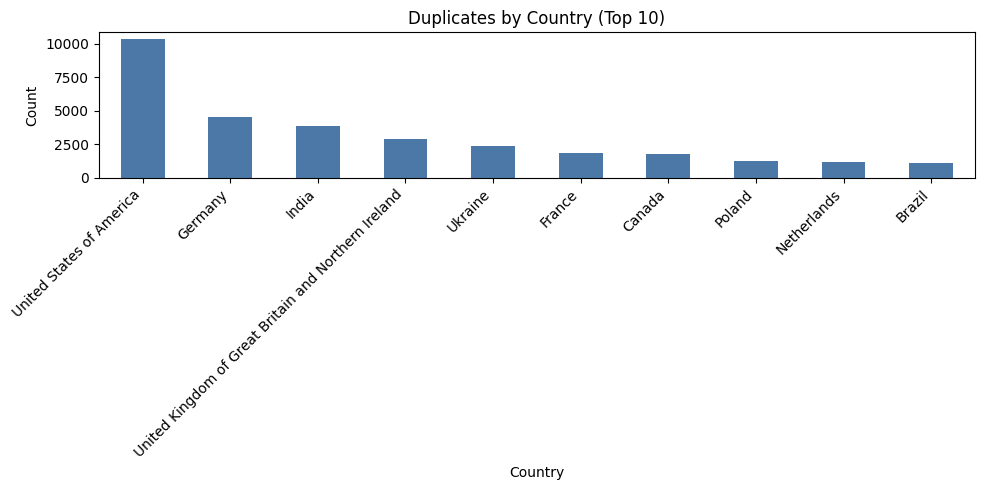

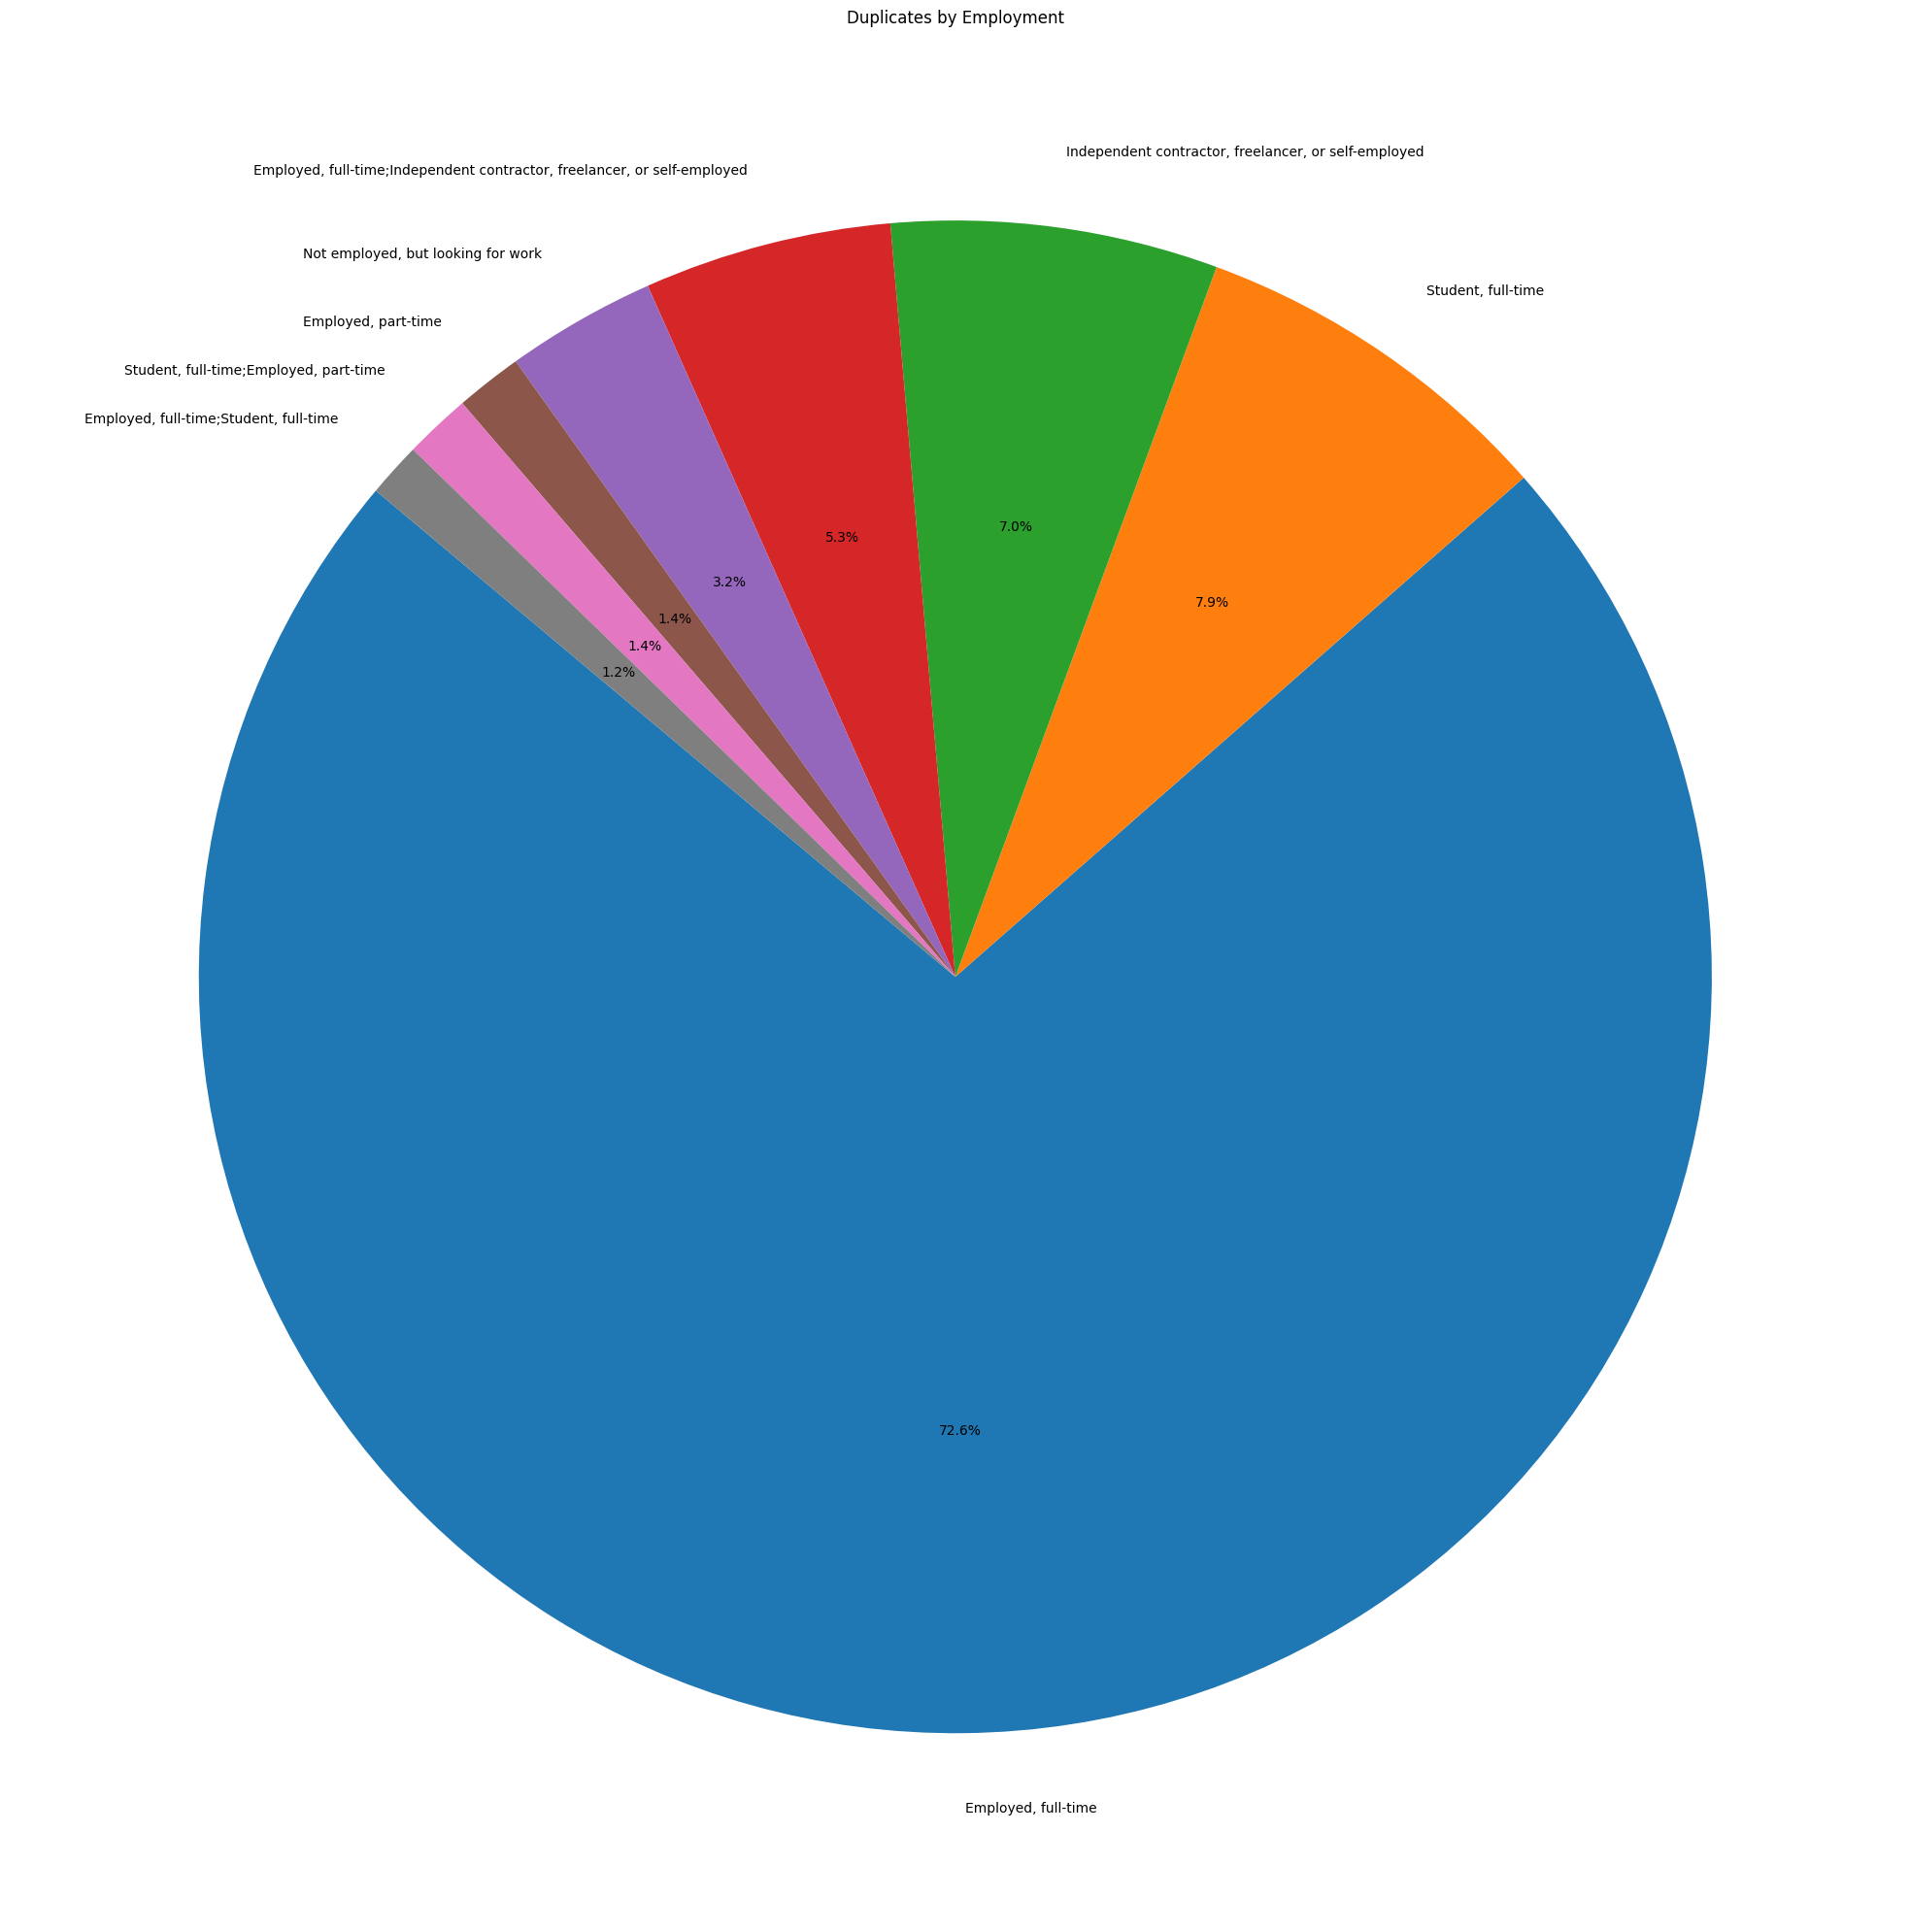

In [20]:
# Country distribution (Top 10)
country_counts = dups_by_subset['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
country_counts.plot(kind='bar', color='#4C78A8')
plt.title('Duplicates by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Employment distribution (Pie)
employment_counts = dups_by_subset['Employment'].value_counts().head(8)
plt.figure(figsize=(20, 20))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Duplicates by Employment')
plt.tight_layout()
plt.show()

In [21]:
#Strategic Removal of Duplicates
# 1) Remove exact duplicates across al columns
df = df.drop_duplicates(keep='first')
print("Original shape:", df.shape)
print("After removing exact duplicates:", df.shape)

# 2) Remove duplicates based on a business-relevant subset of columns (keeps first occurrence)
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']
df = df.drop_duplicates(subset=subset_cols, keep='first')
print("After removing subset-based duplicates:", df.shape)

Original shape: (65437, 223)
After removing exact duplicates: (65437, 223)
After removing subset-based duplicates: (12141, 223)


#Documentation
"""
We first counted exact duplicate rows using df.duplicated() and inspected a small sample.
To analyze duplicates by business context rather than every column, we used the subset ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age'] as a reasonable proxy for similar respondent profiles.
We summarized characteristics (categorical and numerical) of these subset-duplicate rows using describe().
For visualization, we focused on the top-10 countries to avoid overcrowded charts and used a pie chart for employment distribution.
For removal, we demonstrated two strategies:
Exact duplicates removal using drop_duplicates() (all columns).
Subset-based removal using drop_duplicates(subset=...) to keep only one representative record for otherwise identical profiles.
Which strategy to choose depends on the analytics use case. If row-level fields (like compensation) differ meaningfully, keep subset-based dedup conservative or enrich th"""e key.


In [23]:
#Handling Missing Values
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df)).round(4) * 100
missing_summary = pd.DataFrame({"missing_count": missing_counts, "missing_%": missing_pct})
missing_summary.head(15)

,missing_count,missing_%
AINextMuch less integrated,11830,97.44
AINextLess integrated,11558,95.20
AINextNo change,9741,80.23
AINextMuch more integrated,9266,76.32
ConvertedCompYearly,8849,72.89
EmbeddedAdmired,8567,70.56
Knowledge_9,8434,69.47
Frequency_3,8414,69.30
Knowledge_7,8412,69.29
Knowledge_8,8409,69.26


In [24]:
# Calculating missing values in each rows
row_missing_count = df.isnull().sum(axis=1)

#indexes of the rows which has missing values less than 35 
valid_rows = row_missing_count[row_missing_count < 35].index

#New dataframe which includes only these rows
df = df.loc[valid_rows].copy()

# Controlling
print("Max missing values per row after filtering:", df.isnull().sum(axis=1).max())


Max missing values per row after filtering: 34


In [25]:
"""
# Calculate the count of missing values in each column
row_missing_count = df.isnull().sum(axis=1).sort_values(ascending=False)

# drop rows which has missing values greater than 35 
df=df[row_missing_count < 35]
# to control
print(df.isnull().sum(axis=1).max())
"""

'\n# Calculate the count of missing values in each column\nrow_missing_count = df.isnull().sum(axis=1).sort_values(ascending=False)\n\n# drop rows which has missing values greater than 35 \ndf=df[row_missing_count < 35]\n# to control\nprint(df.isnull().sum(axis=1).max())\n'

In [26]:
df.shape

(3651, 223)

In [27]:
#Finding Missing values
pd.set_option('display.max_rows',None)
df_isnull=df.isna().sum().sort_values(ascending=False).to_frame(name='missing value')
#df_isnull

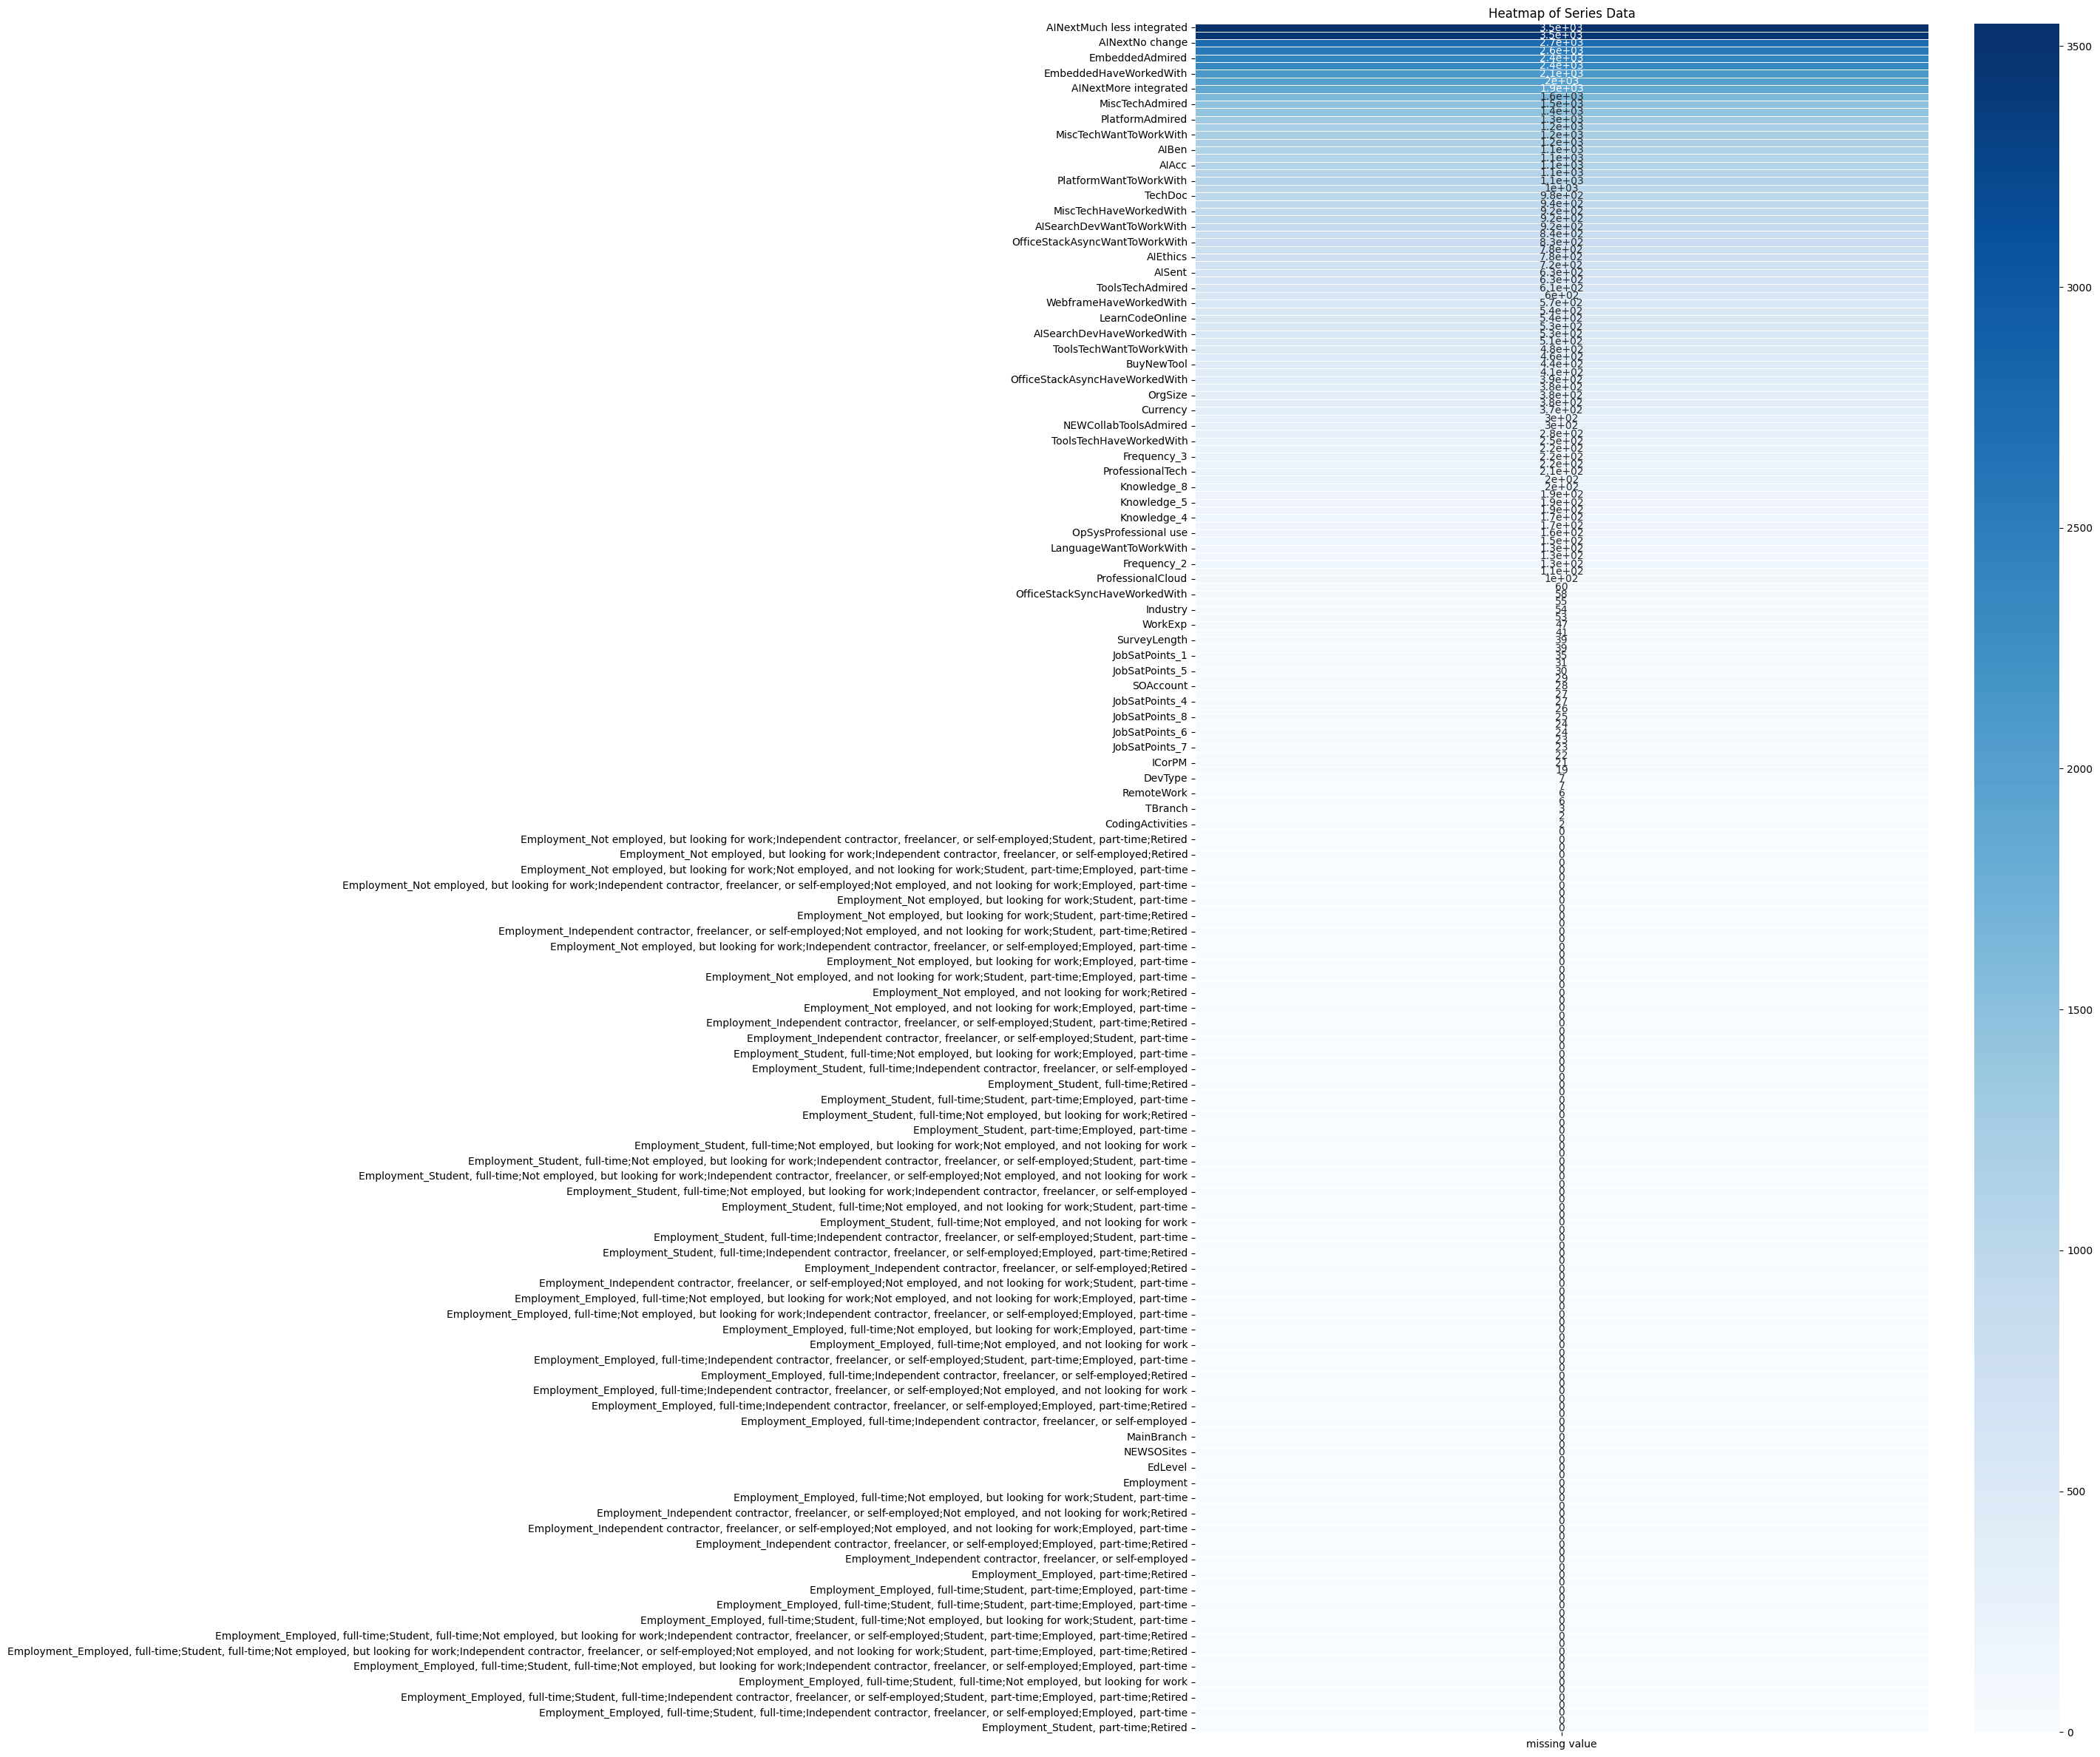

In [28]:
plt.figure(figsize=(16,30))  
sns.heatmap(df_isnull, cmap="Blues", annot=True, linewidths=0.5)
plt.title("Heatmap of Series Data")
plt.show()

In [29]:
# Identify columns with <50% missing (keep JobSat even if >30%)
col_list = ["JobSat"]  # Always include JobSat
for col in df.columns:
    if col != "JobSat" and (df[col].isnull().sum() / df.shape[0]) < 0.5:
        col_list.append(col)

print(f"Selected {len(col_list)} columns with <50% missing values")
df = df[col_list].copy()
print(f"New shape: {df.shape}")

Selected 214 columns with <50% missing values
New shape: (3651, 214)


In [30]:
df['WorkExp'].isnull().value_counts()

WorkExp
False    3604
True       47
Name: count, dtype: int64

In [31]:
# Impute WorkExp with mode (most frequent value), if exists
col = 'WorkExp'
if col in df.columns:
    mode_value = df[col].mode(dropna=True)
    if not mode_value.empty:
        df[col] = df[col].fillna(mode_value[0])
        print(f"Imputed missing values in '{col}' with mode: {mode_value[0]}")
    else:
        print(f"Column '{col}' has no non-null values to compute mode.")
else:
    print(f"Column '{col}' not found in dataframe.")

# Verify imputation
print(col, "missing after imputation:", df[col].isnull().sum())

Imputed missing values in 'WorkExp' with mode: 2.0
WorkExp missing after imputation: 0


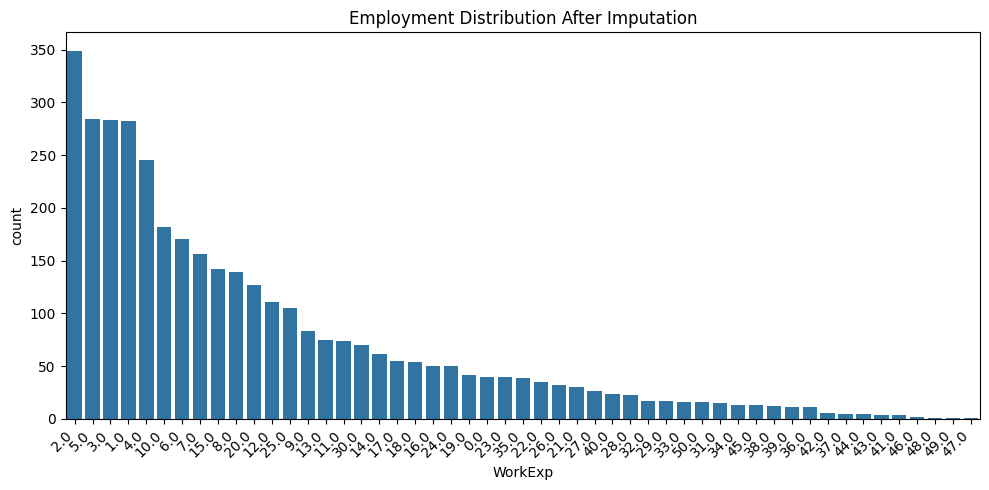

In [32]:
#Visualize Post-Imputation Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='WorkExp', order=df['WorkExp'].value_counts().index)
plt.title('Employment Distribution After Imputation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
df = df.dropna(subset=['JobSat'])

In [34]:
df['RemoteWork'].isnull().sum()

6

In [35]:
majority_remote=df['RemoteWork'].value_counts().idxmax()
df['RemoteWork']=df['RemoteWork'].fillna(majority_remote)
df['RemoteWork'].isnull().sum()

0

In [36]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    1451
Remote                                  1245
In-person                                914
Name: count, dtype: int64

In [37]:
# Count missing values in CodingActivities
missing_coding = df['CodingActivities'].isnull().sum()
total = len(df)
print(f"Missing values in CodingActivities: {missing_coding} ({missing_coding/total*100:.2f}%)")
print(df['CodingActivities'].isnull().value_counts())

Missing values in CodingActivities: 2 (0.06%)
CodingActivities
False    3608
True        2
Name: count, dtype: int64


In [38]:
# Forward-fill missing values
before_ffill = df['CodingActivities'].isnull().sum()
df['CodingActivities'] = df['CodingActivities'].ffill()
after_ffill = df['CodingActivities'].isnull().sum()
print(f"Before forward-fill: {before_ffill} missing")
print(f"After forward-fill: {after_ffill} missing")
df['CodingActivities'].isnull().value_counts()


Before forward-fill: 2 missing
After forward-fill: 0 missing


CodingActivities
False    3610
Name: count, dtype: int64

In [39]:
#Rows with missing values
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

228      30
41355    30
38437    30
12785    30
511      29
13081    28
28011    28
7629     28
63319    28
11748    28
26175    28
3853     28
8737     28
53750    28
9705     28
47587    27
7213     27
40475    27
4650     27
29926    27
dtype: int64

In [40]:
##Data Normalization Techniques
import re
#Normalizing Compensation Data
# Find compensation-related columns using pattern matching
pattern = re.compile(r'(comp|convertedcomp|salary|pay|currency)', re.IGNORECASE)
comp_cols = [col for col in df.columns if pattern.search(col)]
print("Compensation-related columns found:")
for col in comp_cols:
    print(f"  - {col}")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"    Type: numeric, Missing: {df[col].isnull().sum()}")
        print(f"    Summary:\n{df[col].describe()}\n")
    else:
        print(f"    Type: categorical, Missing: {df[col].isnull().sum()}")
        print(f"    Unique values: {df[col].nunique()}\n")



Compensation-related columns found:
  - Currency
    Type: categorical, Missing: 367
    Unique values: 116

  - CompTotal
    Type: numeric, Missing: 1226
    Summary:
count     2.384000e+03
mean     4.194631e+146
std      2.048080e+148
min       0.000000e+00
25%       4.000000e+04
50%       9.300000e+04
75%       5.000000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

  - AIComplex
    Type: categorical, Missing: 1097
    Unique values: 5

  - ConvertedCompYearly
    Type: numeric, Missing: 1584
    Summary:
count    2.026000e+03
mean     6.269753e+04
std      3.171284e+05
min      1.000000e+00
25%      1.493925e+04
50%      3.964000e+04
75%      7.364675e+04
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64



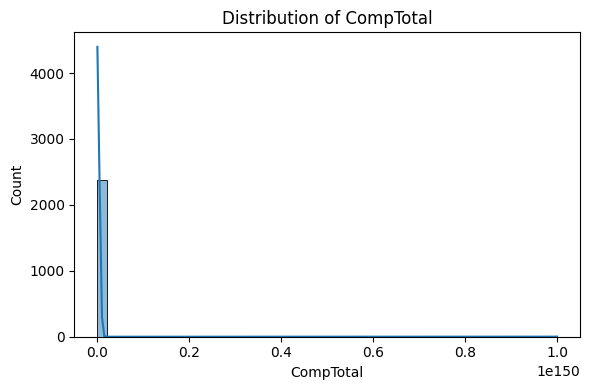

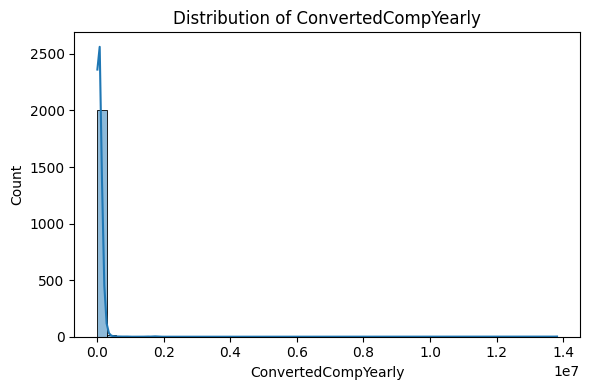

In [41]:
#Visualization of these columns
for c in comp_cols:
    if pd.api.types.is_numeric_dtype(df[c]):
        plt.figure(figsize=(6,4))
        sns.histplot(df[c].dropna(), bins=50, kde=True)
        plt.title(f"Distribution of {c}")
        plt.tight_layout()
        plt.show()

In [42]:
# Focus on ConvertedCompYearly for normalization
if 'ConvertedCompYearly' in df.columns:
    print(f"\nConvertedCompYearly:")
    print(f"  Missing values: {df['ConvertedCompYearly'].isnull().sum()}")
    print(f"  Non-null count: {df['ConvertedCompYearly'].notna().sum()}")
    print(f"\n  Statistics:")
    print(df['ConvertedCompYearly'].describe())


ConvertedCompYearly:
  Missing values: 1584
  Non-null count: 2026

  Statistics:
count    2.026000e+03
mean     6.269753e+04
std      3.171284e+05
min      1.000000e+00
25%      1.493925e+04
50%      3.964000e+04
75%      7.364675e+04
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64


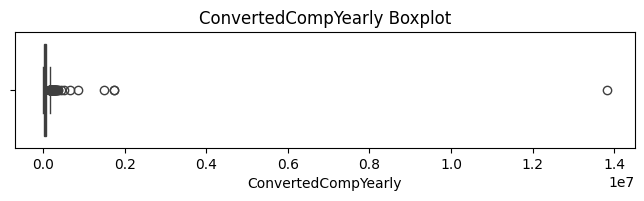

In [43]:
plt.figure(figsize=(8,1.5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('ConvertedCompYearly Boxplot')
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
#Normalize `ConvertedCompYearly` Using Min-Max Scaling
#Min-Max scaling brings all values to a 0-1 range.
# Handle missing values before normalization
print(f"Missing values before dropna: {df['ConvertedCompYearly'].isnull().sum()}")
df = df.dropna(subset=['ConvertedCompYearly']).copy()
print(f"Missing values after dropna: {df['ConvertedCompYearly'].isnull().sum()}")
print(f"Rows available for normalization: {len(df)}")

# Apply Min-Max scaling
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display results
print("\nFirst 10 rows (original vs normalized):")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head(10))
print(f"\nMin-Max range: [{df['ConvertedCompYearly_MinMax'].min():.4f}, {df['ConvertedCompYearly_MinMax'].max():.4f}]")


Missing values before dropna: 1584
Missing values after dropna: 0
Rows available for normalization: 2026

First 10 rows (original vs normalized):
     ConvertedCompYearly  ConvertedCompYearly_MinMax
72                7322.0                    0.000530
389             110000.0                    0.007961
415              79481.0                    0.005752
416             170000.0                    0.012303
417              29000.0                    0.002099
423              66592.0                    0.004819
443             161783.0                    0.011708
451              64570.0                    0.004673
458              52122.0                    0.003772
461             254425.0                    0.018412

Min-Max range: [0.0000, 1.0000]


In [45]:
from scipy import stats
#Apply Z-score Normalization to `ConvertedCompYearly`
#Z-score normalization standardizes values to have mean=0 and std=1.
df['ConvertedCompYearly_Zscore'] = stats.zscore(df['ConvertedCompYearly'])

# Display results
print("First 10 rows (original vs Z-score normalized):")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head(10))
print(f"\nZ-score statistics:")
print(f"  Mean: {df['ConvertedCompYearly_Zscore'].mean():.6f}")
print(f"  Std: {df['ConvertedCompYearly_Zscore'].std():.6f}")
print(f"  Min: {df['ConvertedCompYearly_Zscore'].min():.4f}")
print(f"  Max: {df['ConvertedCompYearly_Zscore'].max():.4f}")

First 10 rows (original vs Z-score normalized):
     ConvertedCompYearly  ConvertedCompYearly_Zscore
72                7322.0                   -0.174659
389             110000.0                    0.149196
415              79481.0                    0.052936
416             170000.0                    0.338440
417              29000.0                   -0.106285
423              66592.0                    0.012283
443             161783.0                    0.312523
451              64570.0                    0.005906
458              52122.0                   -0.033356
461             254425.0                    0.604723

Z-score statistics:
  Mean: -0.000000
  Std: 1.000247
  Min: -0.1977
  Max: 43.3853


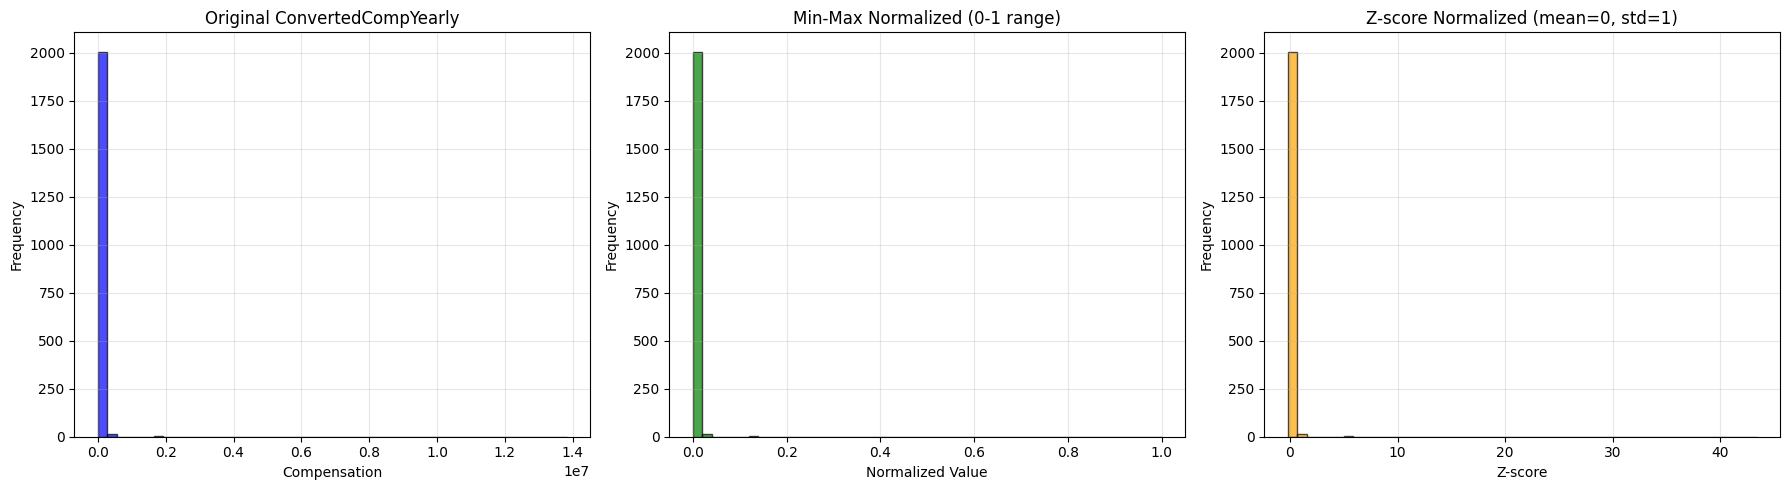


Summary Statistics Comparison:

Original ConvertedCompYearly:
count    2.026000e+03
mean     6.269753e+04
std      3.171284e+05
min      1.000000e+00
25%      1.493925e+04
50%      3.964000e+04
75%      7.364675e+04
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64

Min-Max Normalized:
count    2026.000000
mean        0.004537
std         0.022950
min         0.000000
25%         0.001081
50%         0.002869
75%         0.005330
max         1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64

Z-score Normalized:
count    2.026000e+03
mean    -7.014242e-18
std      1.000247e+00
min     -1.977496e-01
25%     -1.506332e-01
50%     -7.272520e-02
75%      3.453467e-02
max      4.338534e+01
Name: ConvertedCompYearly_Zscore, dtype: float64


In [46]:
#Visualize Distributions of Original and Normalized Data
#Compare the distributions of `ConvertedCompYearly`, `ConvertedCompYearly_MinMax`, and `ConvertedCompYearly_Zscore`.
# Create subplots for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(df['ConvertedCompYearly'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original ConvertedCompYearly')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Min-Max normalized distribution
axes[1].hist(df['ConvertedCompYearly_MinMax'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Min-Max Normalized (0-1 range)')
axes[1].set_xlabel('Normalized Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Z-score normalized distribution
axes[2].hist(df['ConvertedCompYearly_Zscore'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[2].set_title('Z-score Normalized (mean=0, std=1)')
axes[2].set_xlabel('Z-score')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics comparison
print("\nSummary Statistics Comparison:")
print("\nOriginal ConvertedCompYearly:")
print(df['ConvertedCompYearly'].describe())
print("\nMin-Max Normalized:")
print(df['ConvertedCompYearly_MinMax'].describe())
print("\nZ-score Normalized:")
print(df['ConvertedCompYearly_Zscore'].describe())


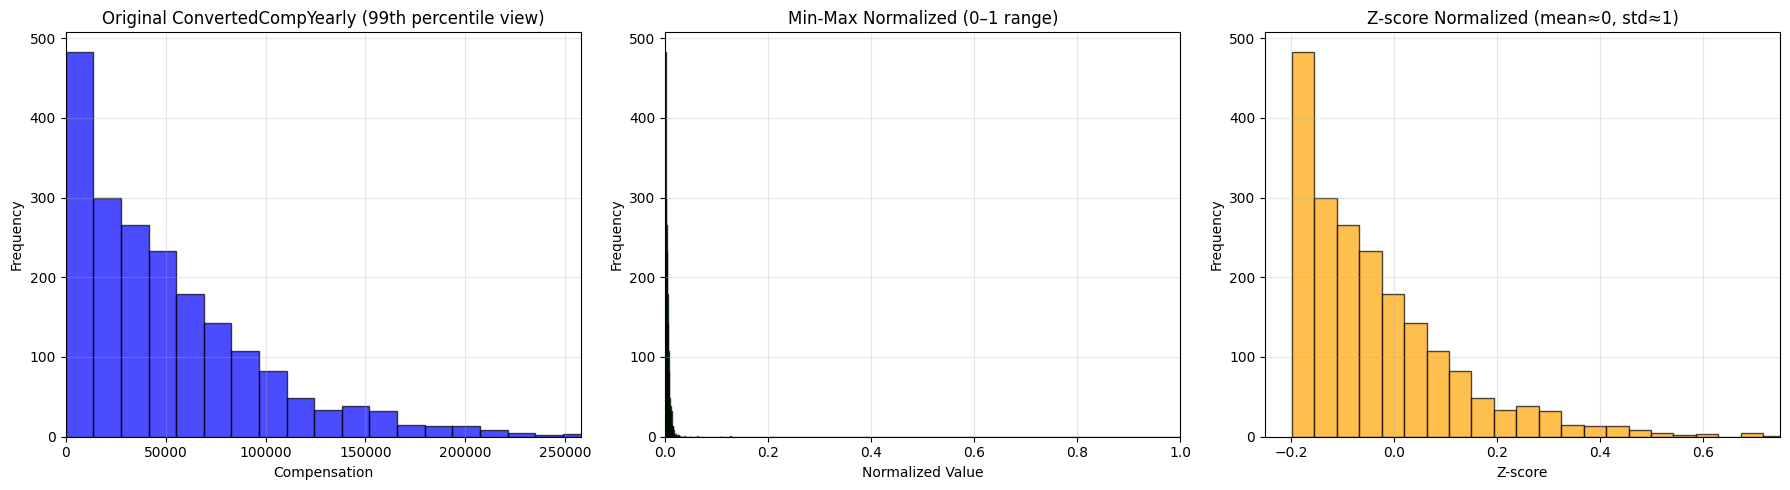

In [47]:
#Visualization of Normalized Data
#Compare the distributions of `ConvertedCompYearly`, `ConvertedCompYearly_MinMax`, and `ConvertedCompYearly_Zscore`.
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1️ Original 
axes[0].hist(df['ConvertedCompYearly'], bins=1000, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original ConvertedCompYearly (99th percentile view)')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, df['ConvertedCompYearly'].quantile(0.99))  # outlier limit

# 2️ Min-Max Normalized
axes[1].hist(df['ConvertedCompYearly_MinMax'], bins=1000, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Min-Max Normalized (0–1 range)')
axes[1].set_xlabel('Normalized Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 1)

# 3️ Z-score Normalized
axes[2].hist(df['ConvertedCompYearly_Zscore'], bins=1000, color='orange', alpha=0.7, edgecolor='black')
axes[2].set_title('Z-score Normalized (mean≈0, std≈1)')
axes[2].set_xlabel('Z-score')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(-0.25, 0.75)


plt.tight_layout()
plt.show()


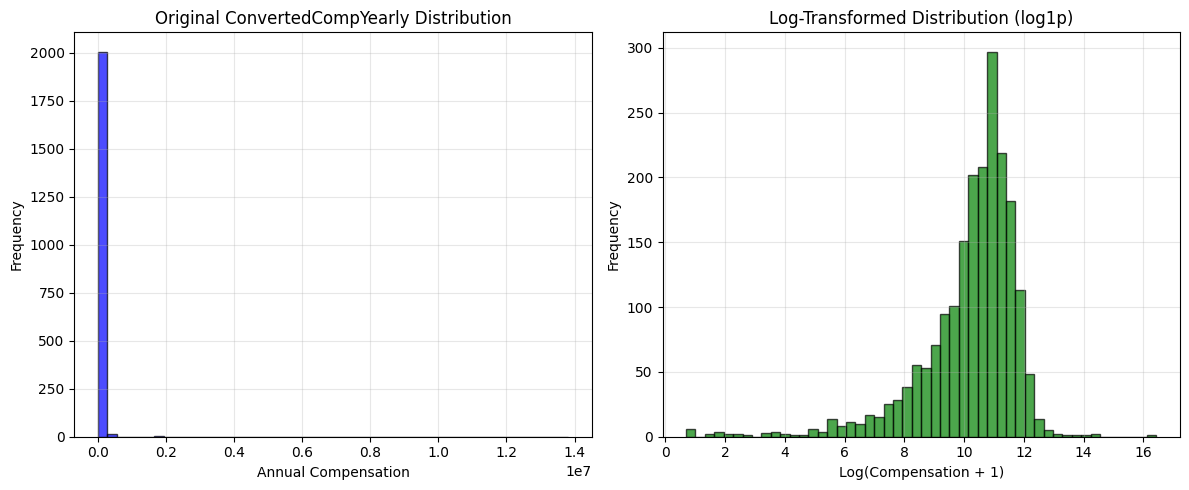


Skewness reduction:
Original skewness: 40.55
Log-transformed skewness: -2.02


In [48]:
# Log transform (np.log1p handles zeros and negative values)
df['log_' + 'ConvertedCompYearly'] = np.log1p(df['ConvertedCompYearly'])    # log(1 + x)


# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].hist(df['ConvertedCompYearly'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original ConvertedCompYearly Distribution')
axes[0].set_xlabel('Annual Compensation')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Log-transformed distribution
axes[1].hist(df['log_ConvertedCompYearly'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Log-Transformed Distribution (log1p)')
axes[1].set_xlabel('Log(Compensation + 1)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
#Log-transformed ConvertedCompYearly to reduce skewness
print(f"\nSkewness reduction:")
print(f"Original skewness: {df['ConvertedCompYearly'].skew():.2f}")
print(f"Log-transformed skewness: {df['log_ConvertedCompYearly'].skew():.2f}")


In [49]:
#Feature Engineering
# Create ExperienceLevel based on YearsCodePro
col = 'YearsCodePro'
print(f"{col} value counts:")
print(df[col].value_counts().head(10))
print(f"\n{col} statistics:")
print(df[col].describe())

# Function to categorize experience levels
def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    try:
        years_float = float(years)
        if years_float < 2:
            return 'Entry'
        elif years_float < 5:
            return 'Junior'
        elif years_float < 10:
            return 'Mid'
        elif years_float < 15:
            return 'Senior'
        else:
            return 'Expert'
    except:
        return 'Unknown'

# Create ExperienceLevel column
df['ExperienceLevel'] = df[col].apply(categorize_experience)

# Display results
print(f"\nExperienceLevel distribution:")
print(df['ExperienceLevel'].value_counts())
print(f"\nFirst 10 rows with ExperienceLevel:")
print(df[[col, 'ExperienceLevel']].head(10))


YearsCodePro value counts:
YearsCodePro
3                   198
2                   181
5                   171
4                   151
1                   128
6                   118
10                  101
Less than 1 year     96
7                    86
8                    80
Name: count, dtype: int64

YearsCodePro statistics:
count     2016
unique      48
top          3
freq       198
Name: YearsCodePro, dtype: object

ExperienceLevel distribution:
ExperienceLevel
Junior     530
Mid        516
Expert     470
Senior     275
Entry      128
Unknown    107
Name: count, dtype: int64

First 10 rows with ExperienceLevel:
    YearsCodePro ExperienceLevel
72             1           Entry
389            7             Mid
415           16          Expert
416           17          Expert
417            1           Entry
423            4          Junior
443           17          Expert
451            9             Mid
458           11          Senior
461           24          Expert


In [50]:
# Clean YearsCodePro column (FIXED: proper handling of string values)
# Drop NaN values
df_clean = df.dropna(subset=['YearsCodePro']).copy()
print(f"Rows after dropping NaN in YearsCodePro: {len(df_clean)}")

# Replace text values with numeric equivalents
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '50'
})

# Convert to numeric, coercing errors to NaN
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Drop rows that couldn't be converted
df_clean = df_clean.dropna(subset=['YearsCodePro']).copy()

# Convert to int
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].astype(int)

# Create experience ranges
bins = [0, 5, 10, 20, 100]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df_clean['Experience_Range'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

print(f"\nExperience range distribution:")
print(df_clean['Experience_Range'].value_counts())

# Calculate median JobSat by experience range
median_satisfaction = df_clean.groupby('Experience_Range', observed=True)['JobSat'].median()

print(f"\nMedian Job Satisfaction by Experience Range:")
print(median_satisfaction)

# Update df with cleaned data
df = df_clean.copy()


Rows after dropping NaN in YearsCodePro: 2016

Experience range distribution:
Experience_Range
0-5 years      925
5-10 years     446
10-20 years    389
>20 years      256
Name: count, dtype: int64

Median Job Satisfaction by Experience Range:
Experience_Range
0-5 years      7.0
5-10 years     7.0
10-20 years    8.0
>20 years      8.0
Name: JobSat, dtype: float64


In [51]:
#Exploratory Data Analysis

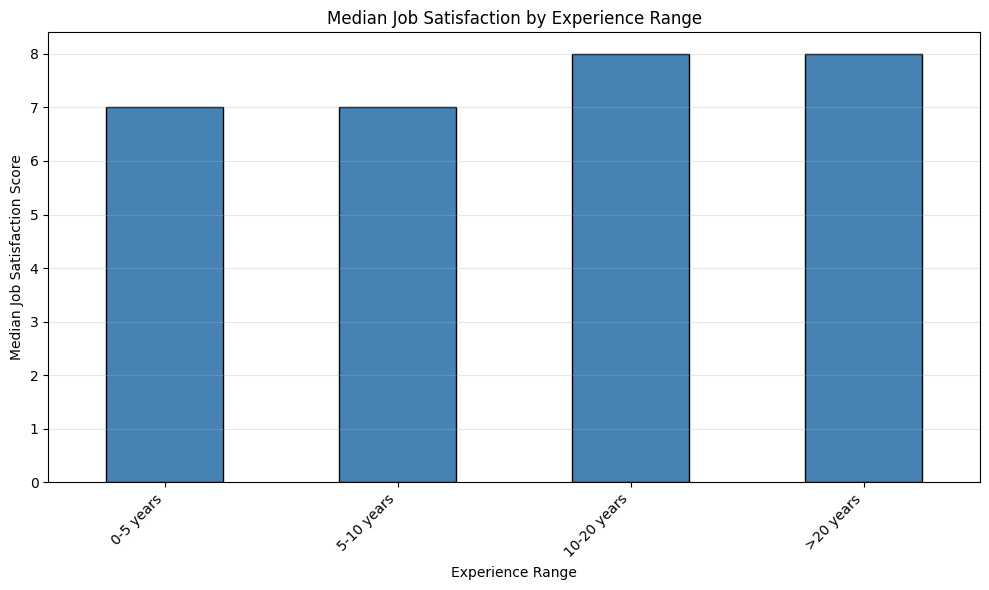

In [52]:
# Visualize median satisfaction by experience range
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

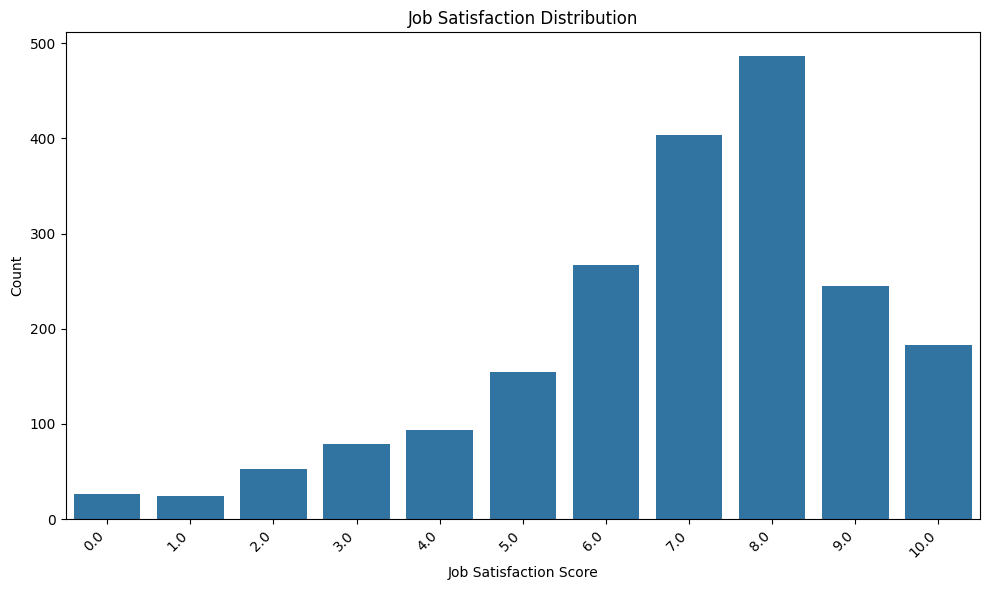

In [53]:
# Job satisfaction distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', order=sorted(df['JobSat'].unique()))
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

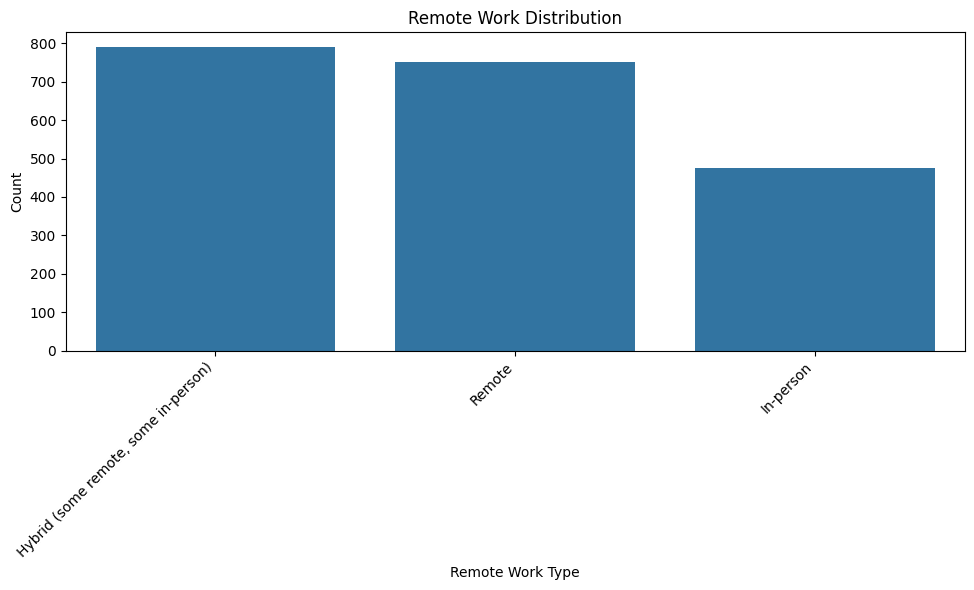


Remote Work by Employment Type:
 
RemoteWork                                          Hybrid (some remote, some in-person)  In-person  Remote
Employment                                                                                                 
Employed, full-time                                                                  219        229     230
Employed, full-time;Employed, part-time                                               25          6      25
Employed, full-time;Independent contractor, fre...                                   135         66     151
Employed, full-time;Independent contractor, fre...                                    22          3      22
Employed, full-time;Independent contractor, fre...                                     0          1       0
Employed, full-time;Independent contractor, fre...                                    20          7      18
Employed, full-time;Independent contractor, fre...                                     2          1  

In [54]:
pd.set_option('display.width', 1500)  # to see 3 column together
# Remote work distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cross-tabulation: Remote work by Employment type
print("\nRemote Work by Employment Type:")
cross_tab_emp = pd.crosstab(df['Employment'], df['RemoteWork'])
print(" ")
print(cross_tab_emp)



Remote Work Preferences by DevType (%):
RemoteWork                                     Hybrid (some remote, some in-person)  In-person  Remote
DevType                                                                                               
Academic researcher                                                           41.07      44.64   14.29
Data scientist or machine learning specialist                                 43.75      31.25   25.00
DevOps specialist                                                             51.79       8.93   39.29
Developer, back-end                                                           35.34      16.67   47.99
Developer, desktop or enterprise applications                                 27.63      43.42   28.95
Developer, front-end                                                          28.85      23.08   48.08
Developer, full-stack                                                         39.46      24.61   35.93
Developer, mobile               

<Figure size 1800x1200 with 0 Axes>

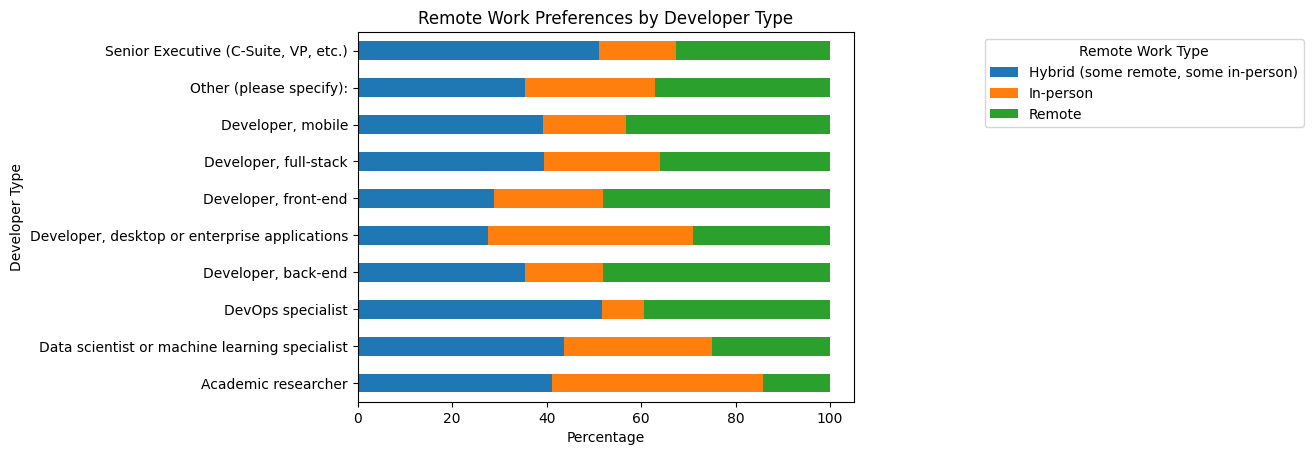

In [55]:
# Remote work preferences by DevType (if DevType is available)
if 'DevType' in df.columns:
    # Get top DevTypes for analysis (to avoid too many categories)
    top_devtypes = df['DevType'].value_counts().head(10).index
    
    # Filter data for top DevTypes
    df_devtype = df[df['DevType'].isin(top_devtypes)]
    
    # Remote work by DevType (normalized percentages)
    remote_by_devtype = df_devtype.groupby('DevType')['RemoteWork'].value_counts(normalize=True).unstack(fill_value=0) * 100
    
    print("\nRemote Work Preferences by DevType (%):")
    print(remote_by_devtype.round(2))
    
    # Visualize
    plt.figure(figsize=(18, 12),)
    remote_by_devtype.plot(kind='barh', stacked=True)
    plt.title('Remote Work Preferences by Developer Type')
    plt.xlabel('Percentage')
    plt.ylabel('Developer Type')
    plt.legend(title='Remote Work Type', bbox_to_anchor=(1.25, 1), loc='upper left')


    plt.show()
    
else:
    print("DevType column not available in dataset")

Top 20 Language-Country Combinations:
                                 Country                             LanguageHaveWorkedWith  count
0                                  India                        HTML/CSS;JavaScript;PHP;SQL      3
1                              Argentina                        HTML/CSS;JavaScript;PHP;SQL      3
2   Venezuela, Bolivarian Republic of...                            HTML/CSS;JavaScript;PHP      2
3                             Bangladesh                            HTML/CSS;JavaScript;PHP      2
4               United States of America              C#;HTML/CSS;JavaScript;SQL;TypeScript      2
5                               Bulgaria                         C#;HTML/CSS;JavaScript;SQL      2
6                              Indonesia                 HTML/CSS;JavaScript;SQL;TypeScript      2
7                                Georgia                                      Go;Python;SQL      2
8                             Bangladesh                        HTML/CS

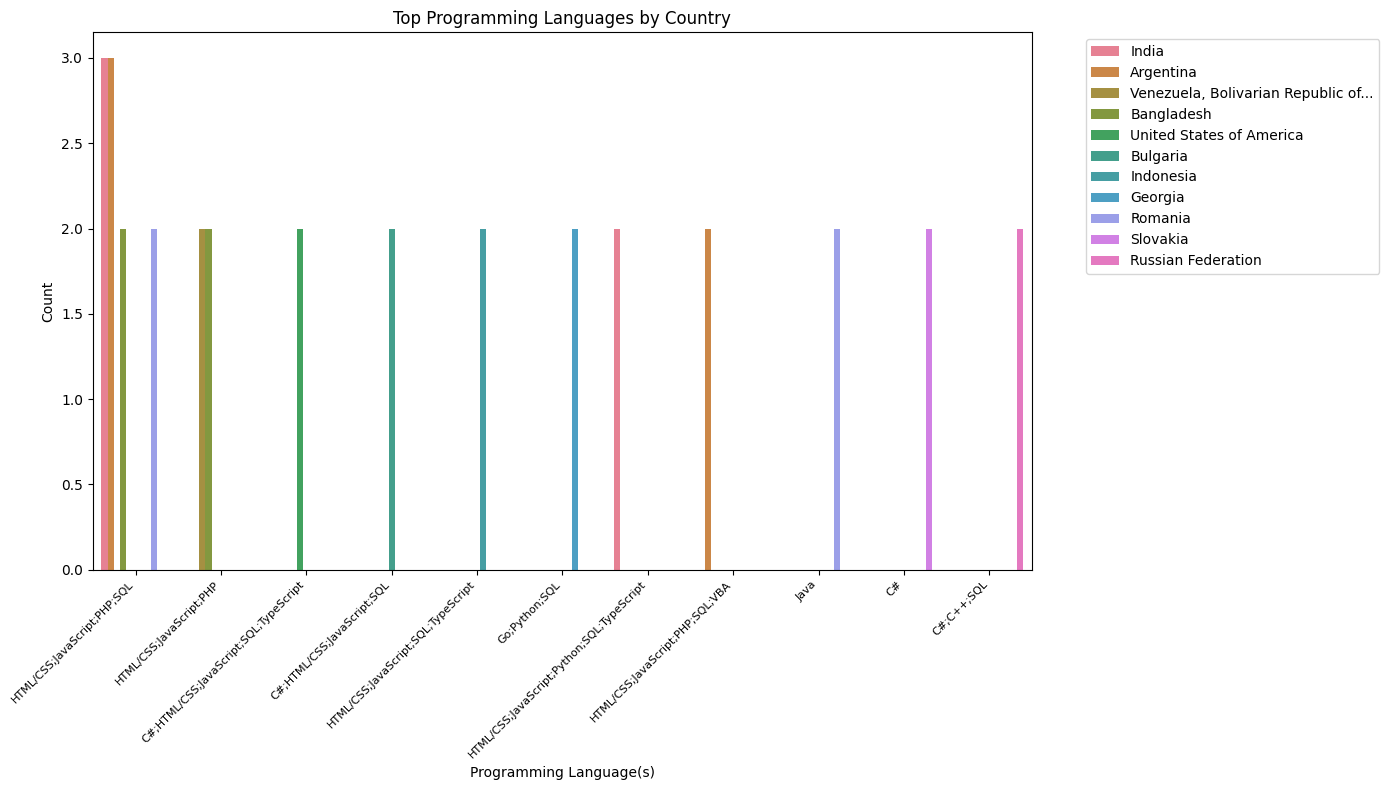

In [56]:
# Analyze top programming languages by country
if 'LanguageHaveWorkedWith' in df.columns and 'Country' in df.columns:
    # Get top language-country combinations
    lang_country = df.groupby('Country')['LanguageHaveWorkedWith'].value_counts().sort_values(ascending=False).head(20)
    
    # Convert to DataFrame
    lang_df = lang_country.reset_index(name='count')
    
    print("Top 20 Language-Country Combinations:")
    print(lang_df)
    
    # Visualize
    plt.figure(figsize=(14, 8))
    sns.barplot(data=lang_df.head(15), x='LanguageHaveWorkedWith', y='count', hue='Country')
    plt.title('Top Programming Languages by Country')
    plt.xlabel('Programming Language(s)')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns (LanguageHaveWorkedWith or Country) not available")

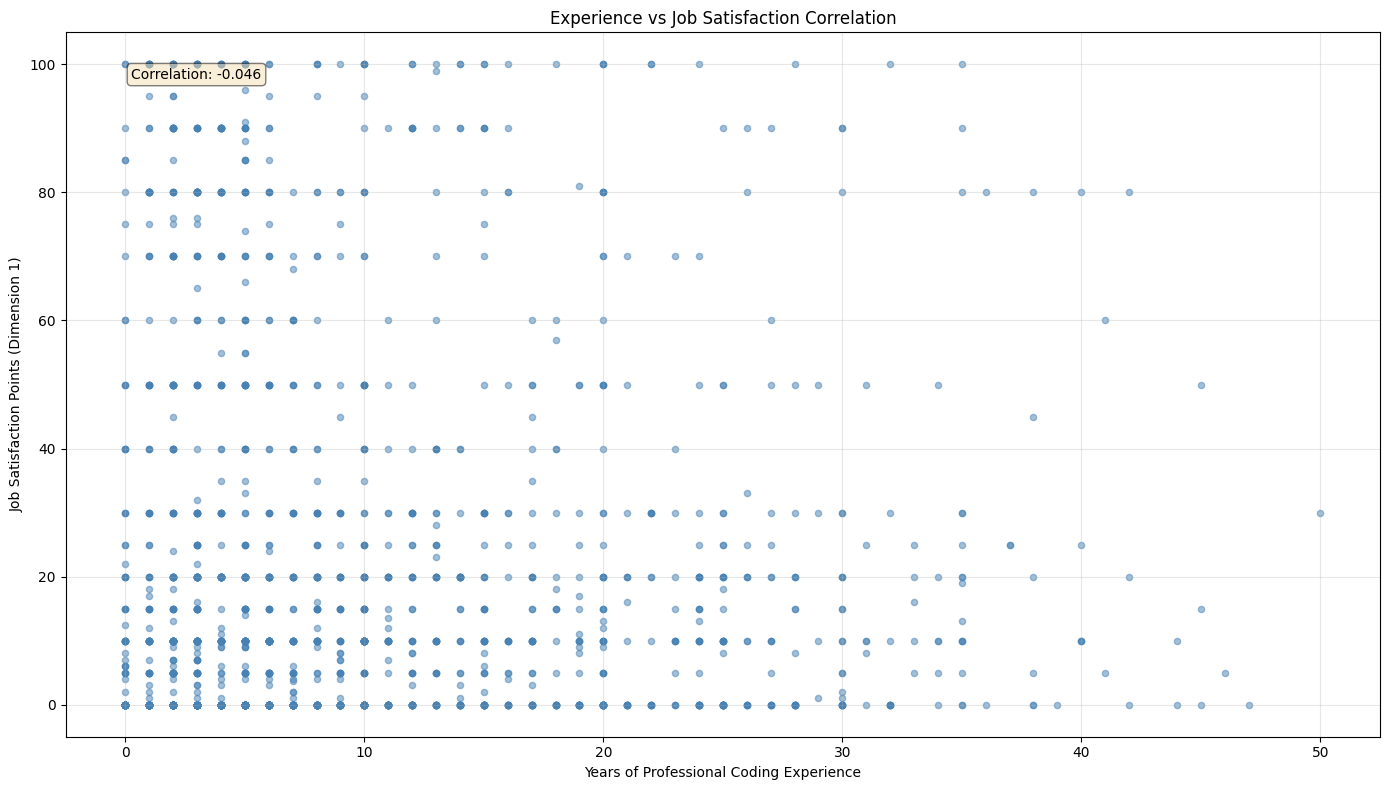

Correlation coefficient: -0.046


In [57]:
# Scatter plot: Experience vs Satisfaction (FIXED: added plt.show())
if 'JobSatPoints_1' in df.columns and 'YearsCodePro' in df.columns:
    # Filter out NaN values
    df_clean_scatter = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1']).copy()
    
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.scatter(x=df_clean_scatter['YearsCodePro'], y=df_clean_scatter['JobSatPoints_1'], 
               alpha=0.5, s=20, color='steelblue')
    ax.set_xlabel('Years of Professional Coding Experience')
    ax.set_ylabel('Job Satisfaction Points (Dimension 1)')
    ax.set_title('Experience vs Job Satisfaction Correlation')
    ax.grid(True, alpha=0.3)
    
    # Calculate correlation
    correlation = df_clean_scatter['YearsCodePro'].corr(df_clean_scatter['JobSatPoints_1'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Correlation coefficient: {correlation:.3f}")
else:
    print("Required columns (JobSatPoints_1 or YearsCodePro) not available")

<Figure size 1400x800 with 0 Axes>

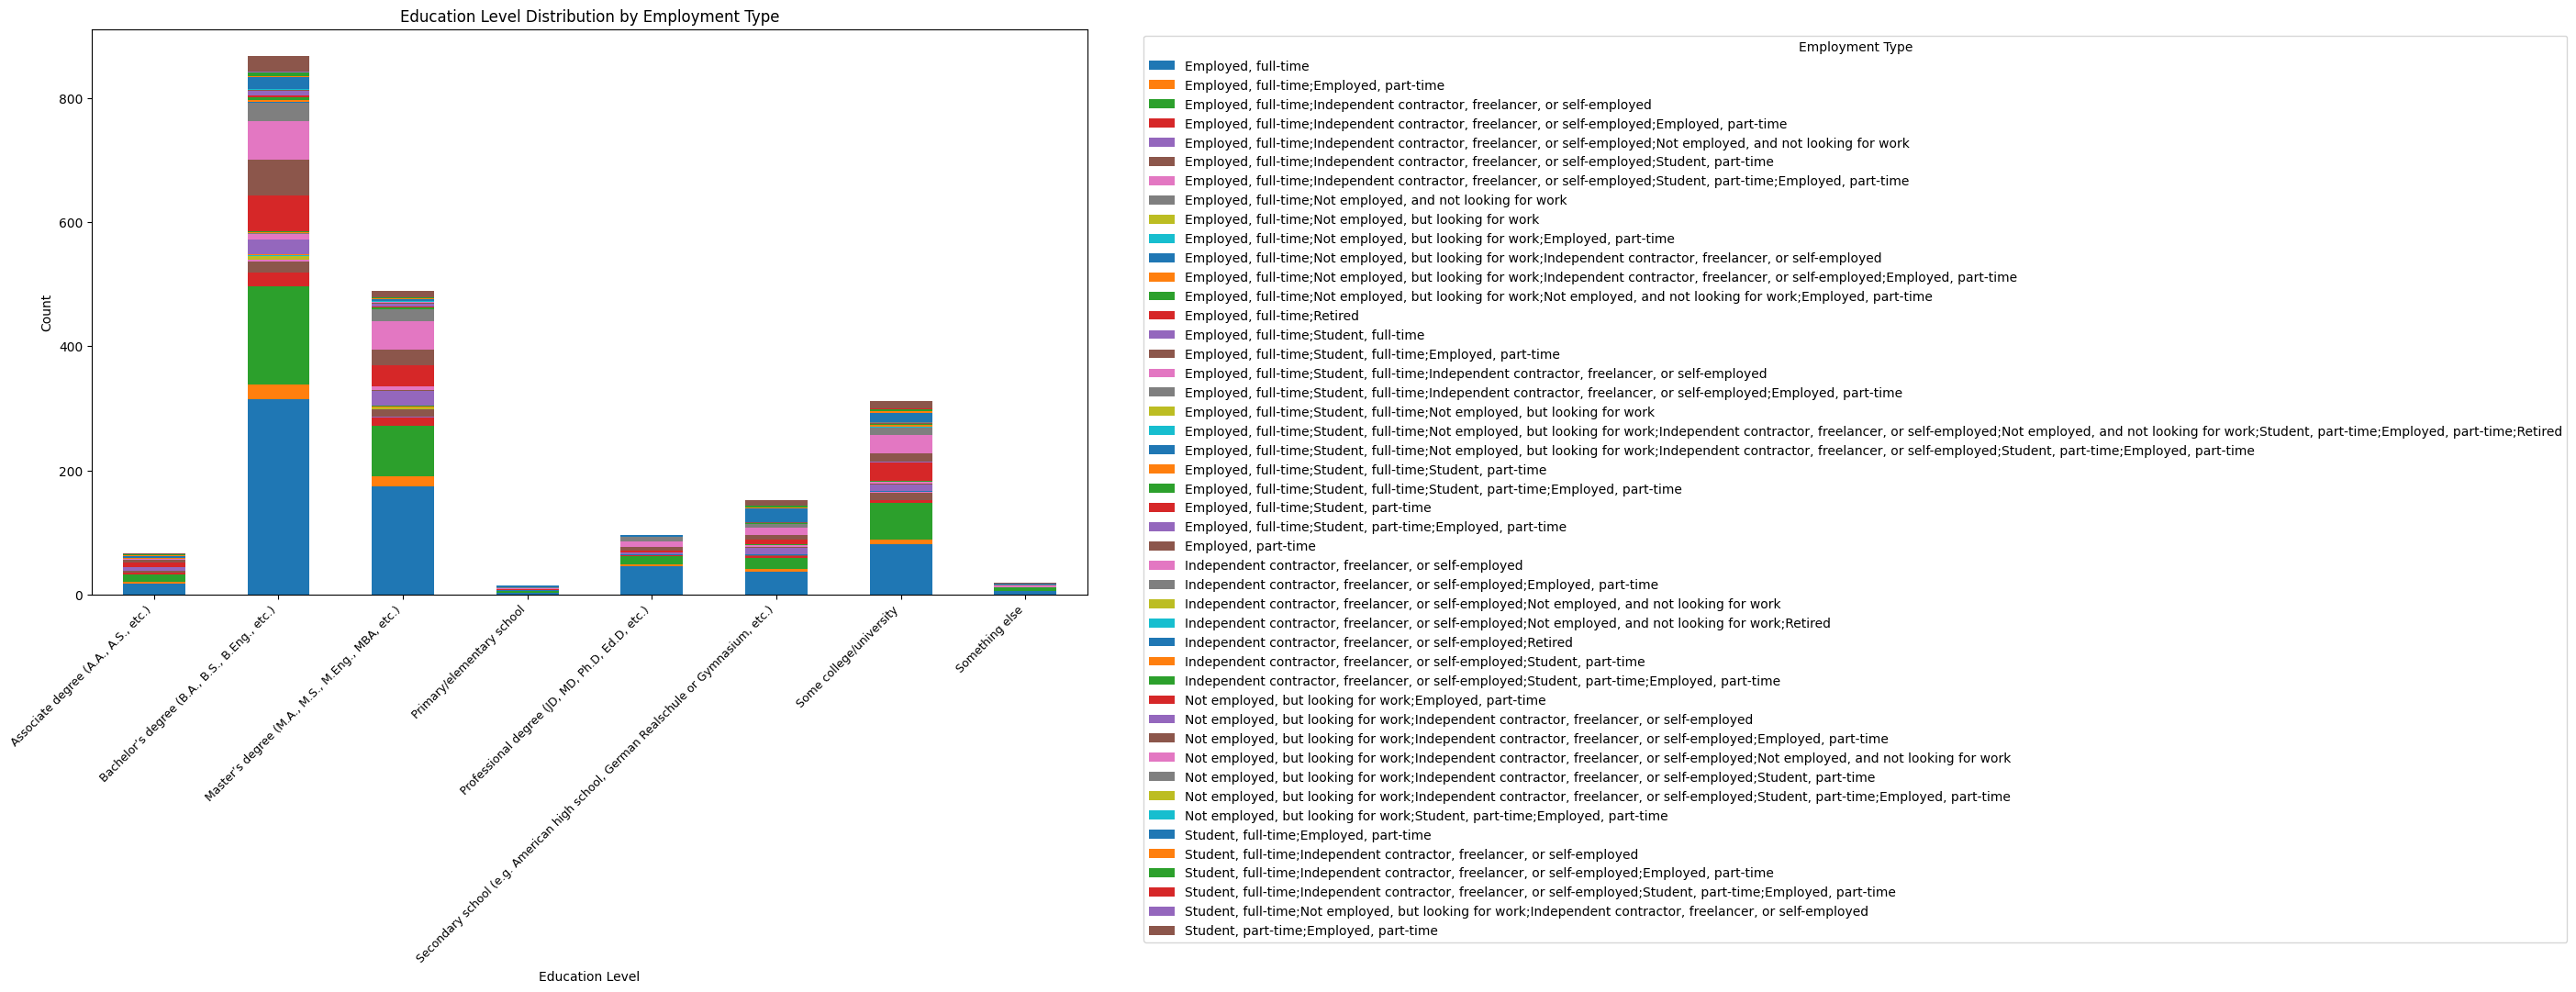

In [58]:
# Cross-tabulation: Education Level by Employment Type
if 'EdLevel' in df.columns and 'Employment' in df.columns:
    
    # Visualize with stacked bar chart (FIXED: reasonable figure size)
    cross_tab_ed = pd.crosstab(df['EdLevel'], df['Employment'])
    plt.figure(figsize=(14, 8))
    cross_tab_ed.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title('Education Level Distribution by Employment Type')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    


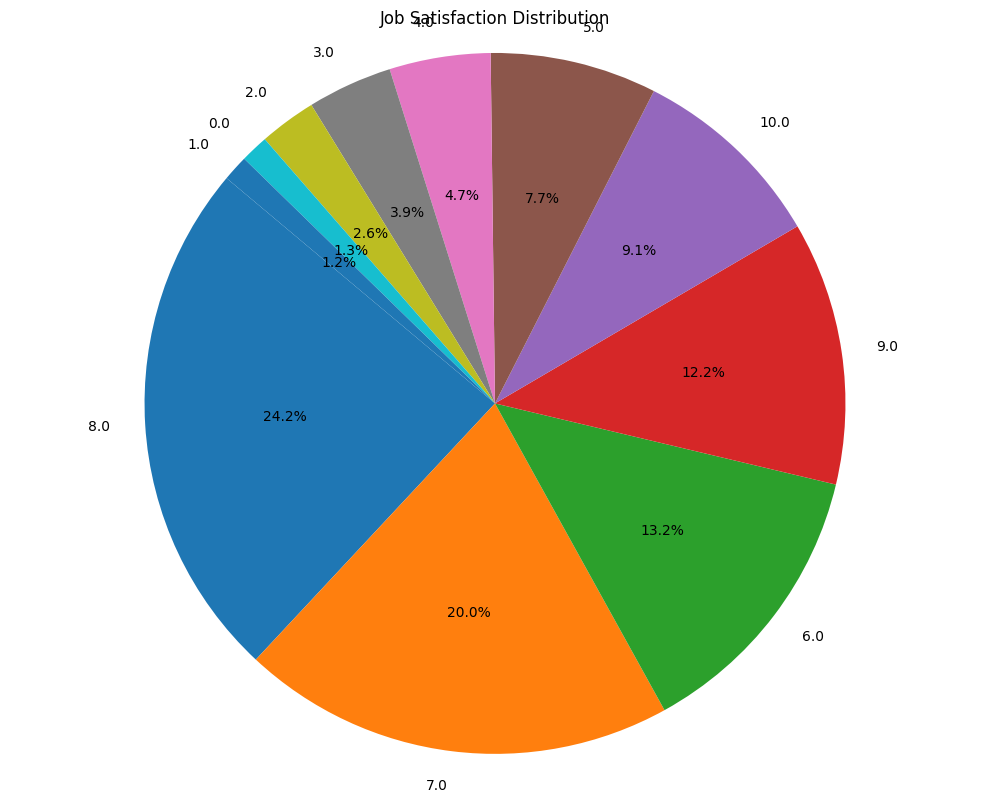

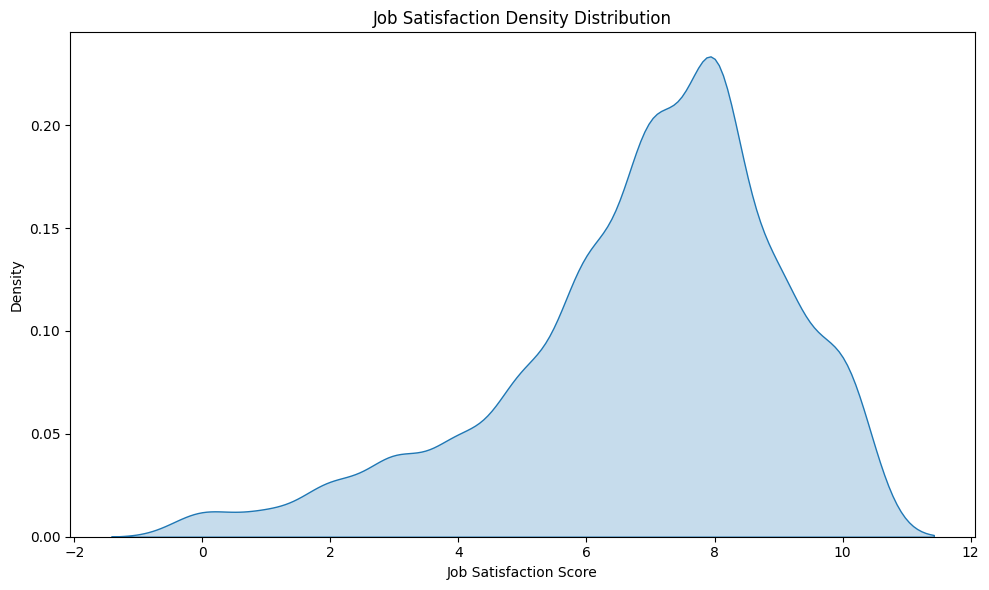

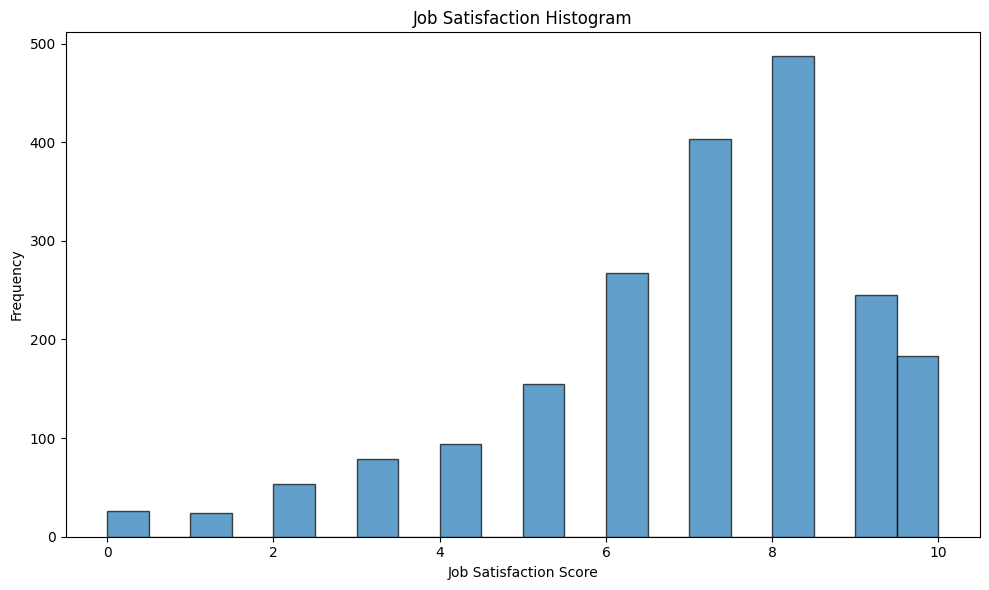

In [59]:
# Job Satisfaction visualization
if 'JobSat' in df.columns:
    JobSat_count = df['JobSat'].value_counts()
    
    # Pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(JobSat_count, labels=JobSat_count.index, autopct='%1.1f%%', startangle=140)
    plt.title('Job Satisfaction Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='JobSat', fill=True)
    plt.title('Job Satisfaction Density Distribution')
    plt.xlabel('Job Satisfaction Score')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()
    
    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['JobSat'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Job Satisfaction Histogram')
    plt.xlabel('Job Satisfaction Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Top 20 Programming Languages:
                   Language  Worked  Wanted
0                JavaScript    1400     927
1                       SQL    1226     949
2                  HTML/CSS    1220     828
3                    Python    1094     947
4                TypeScript     914     809
5   Bash/Shell (all shells)     742     528
6                      Java     629     345
7                        C#     618     454
8                       PHP     523     285
9                       C++     462     337
10                        C     413     268
11               PowerShell     333     162
12                       Go     331     593
13                     Rust     257     673
14                   Kotlin     231     304
15                     Dart     183     182
16                        R     118     109
17                     Ruby     118     112
18                    Swift     112     152
19                      Lua     106     112


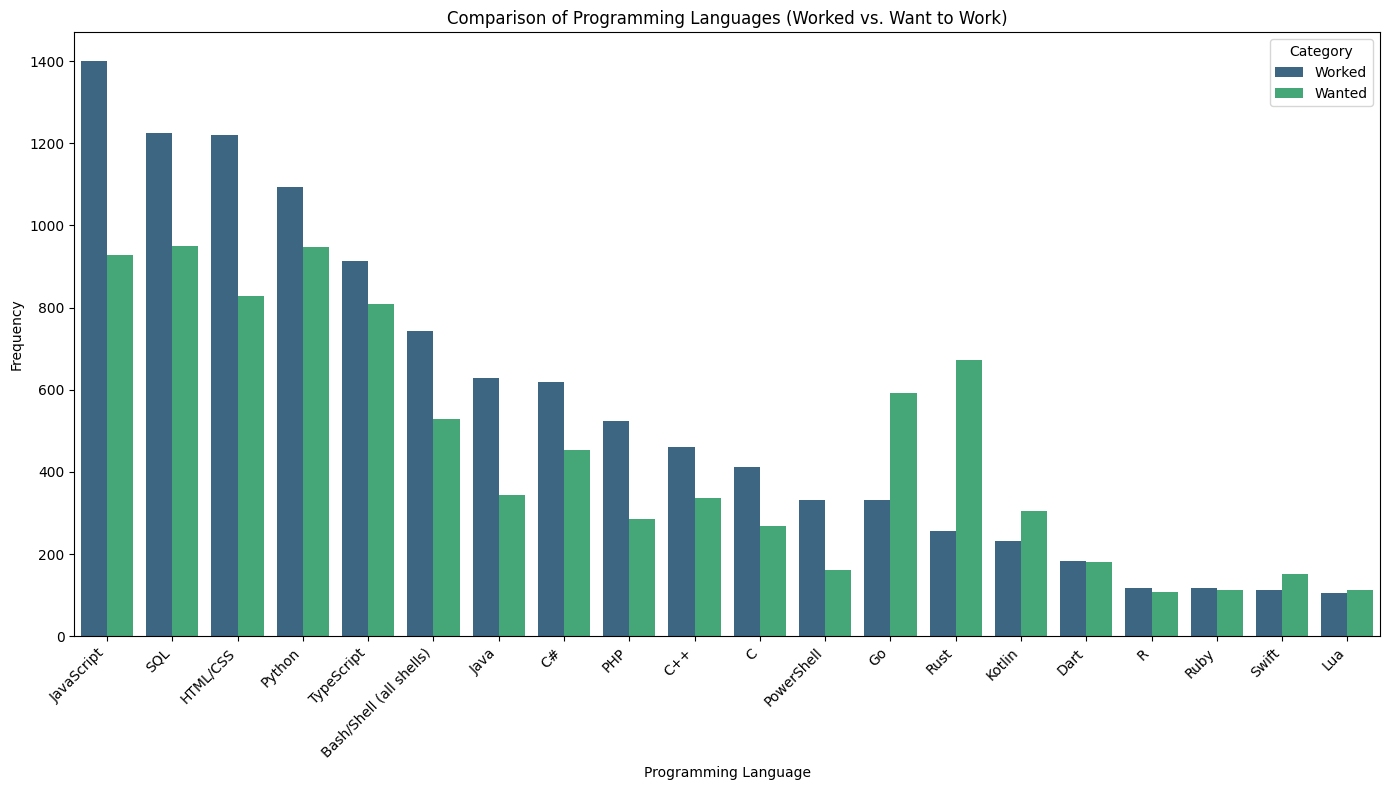

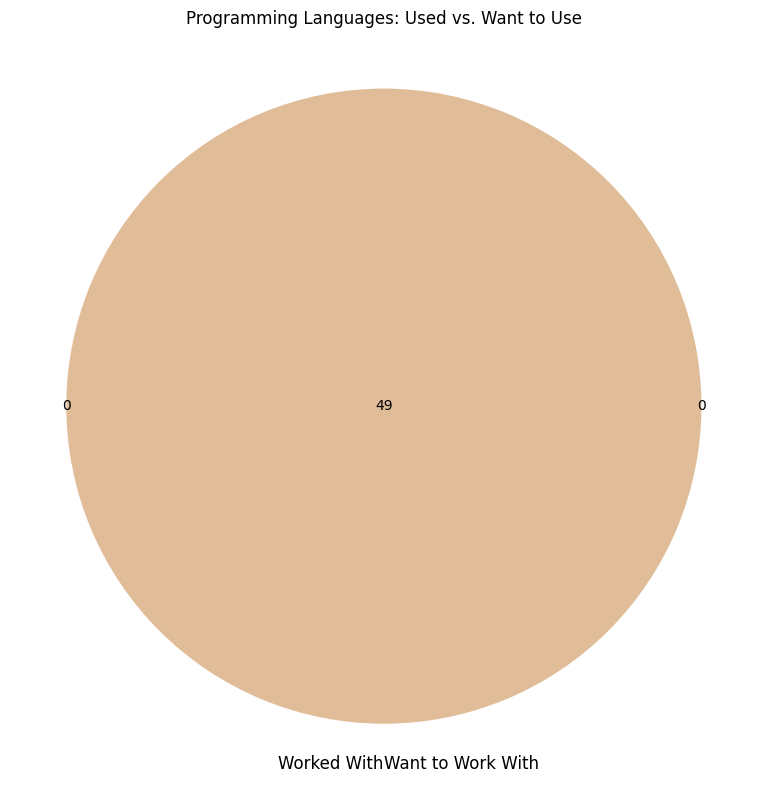

In [60]:
from matplotlib_venn import venn2
# Programming languages analysis
if 'LanguageHaveWorkedWith' in df.columns and 'LanguageWantToWorkWith' in df.columns:
    # Split and explode languages
    worked_languages = df["LanguageHaveWorkedWith"].dropna().str.split(";").explode()
    wanted_languages = df["LanguageWantToWorkWith"].dropna().str.split(";").explode()
    
    # Frequency counts
    worked_freq = worked_languages.value_counts().reset_index()
    wanted_freq = wanted_languages.value_counts().reset_index()
    
    worked_freq.columns = ["Language", "Worked"]
    wanted_freq.columns = ["Language", "Wanted"]
    
    # Merge
    df_langs = pd.merge(worked_freq, wanted_freq, on="Language", how="outer").fillna(0)
    df_langs["Worked"] = df_langs["Worked"].astype(int)
    df_langs["Wanted"] = df_langs["Wanted"].astype(int)
    
    print("Top 20 Programming Languages:")
    print(df_langs.head(20))
    
    # Grouped bar chart
    df_melted = df_langs.head(20).melt(id_vars=["Language"], var_name="Category", value_name="Count")
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_melted, x="Language", y="Count", hue="Category", palette="viridis")
    plt.title("Comparison of Programming Languages (Worked vs. Want to Work)")
    plt.ylabel("Frequency")
    plt.xlabel("Programming Language")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Category")
    plt.tight_layout()
    plt.show()

    # Venn diagram (if matplotlib_venn available)
    try:
        from matplotlib_venn import venn2
        set_worked = set(worked_languages)
        set_wanted = set(wanted_languages)
        
        plt.figure(figsize=(8, 8))
        venn2([set_worked, set_wanted], ('Worked With', 'Want to Work With'))
        plt.title("Programming Languages: Used vs. Want to Use")
        plt.tight_layout()
        plt.show()
    except ImportError:
        print("matplotlib_venn not available, skipping Venn diagram")


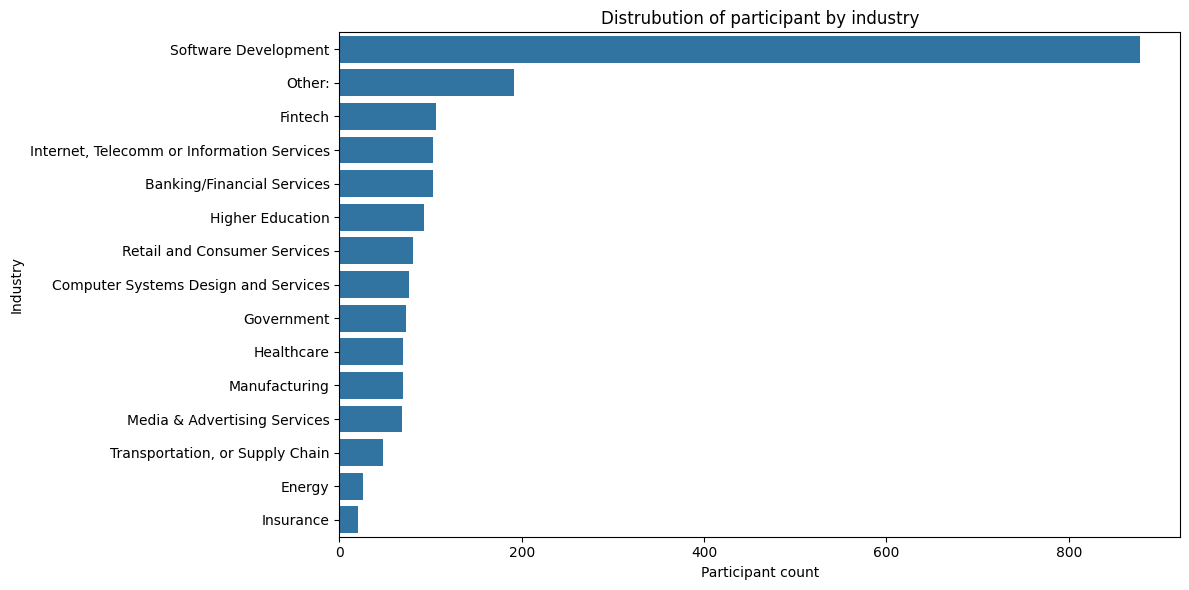

In [61]:
#Disturbution of industry column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index)
plt.title('Distrubution of participant by industry')
plt.xlabel('Participant count')
plt.ylabel('Industry')
plt.tight_layout() 
plt.show()

In [62]:
#Finding outliers
# High compensation outliers
if 'ConvertedCompYearly' in df.columns:
    # Drop NaN values for analysis
    comp_data = df['ConvertedCompYearly'].dropna()
    
    # Basic statistics
    mean_comp = comp_data.mean()
    median_comp = comp_data.median()
    std_comp = comp_data.std()
    
    print(f"Mean Annual Compensation: ${mean_comp:,.2f}")
    print(f"Median Annual Compensation: ${median_comp:,.2f}")
    print(f"Standard Deviation: ${std_comp:,.2f}")
    
    # Identify outliers (3 standard deviations above mean)
    threshold = mean_comp + 3 * std_comp
    high_outliers = df[df['ConvertedCompYearly'] > threshold]
    
    print(f"\nThreshold (Mean + 3*Std): ${threshold:,.2f}")
    print(f"Number of high compensation outliers: {len(high_outliers)}")
    print(f"\nOutlier compensation values:")
    print(high_outliers[['ConvertedCompYearly']].head(10))
else:
    print("ConvertedCompYearly column not found")


Mean Annual Compensation: $62,841.00
Median Annual Compensation: $39,640.00
Standard Deviation: $317,900.96

Threshold (Mean + 3*Std): $1,016,543.89
Number of high compensation outliers: 4

Outlier compensation values:
       ConvertedCompYearly
7979             1728025.0
12723           13818022.0
13755            1500000.0
14145            1750749.0


Q1 (25th percentile): $15,000.00
Q3 (75th percentile): $73,734.75
IQR: $58,734.75

Lower bound: $-73,102.12
Upper bound: $161,836.88

Number of outliers (IQR method): 85
Percentage of outliers: 4.22%


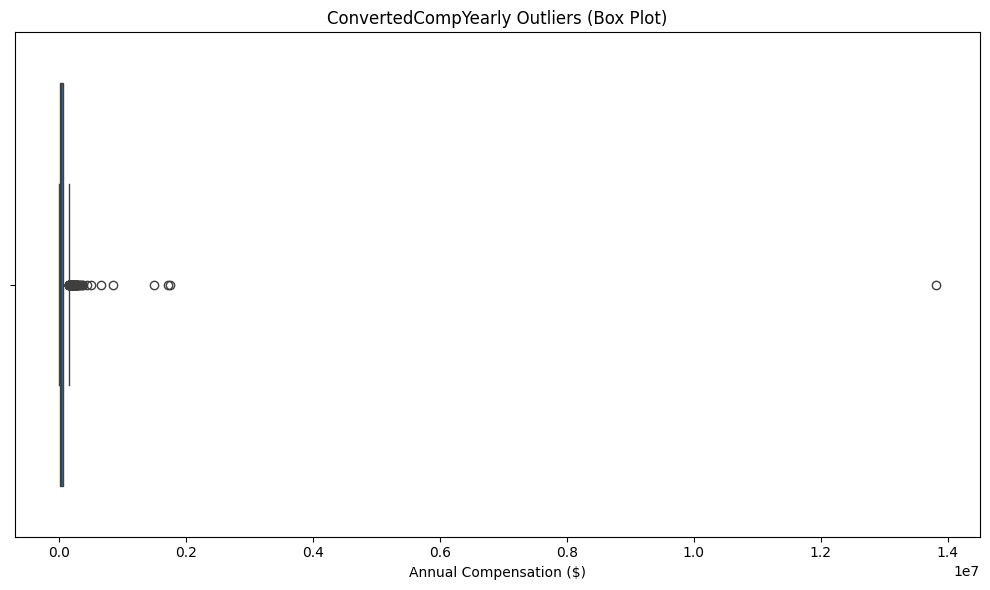

In [63]:
# IQR method for outlier detection
if 'ConvertedCompYearly' in df.columns:
    comp_data = df['ConvertedCompYearly'].dropna()
    
    # Calculate IQR
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"Q1 (25th percentile): ${Q1:,.2f}")
    print(f"Q3 (75th percentile): ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nLower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    
    # Identify outliers
    iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    num_iqr_outliers = len(iqr_outliers)
    
    print(f"\nNumber of outliers (IQR method): {num_iqr_outliers}")
    print(f"Percentage of outliers: {num_iqr_outliers/len(comp_data)*100:.2f}%")
    
    # Box plot visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['ConvertedCompYearly'], showfliers=True)
    plt.title('ConvertedCompYearly Outliers (Box Plot)')
    plt.xlabel('Annual Compensation ($)')
    plt.tight_layout()
    plt.show()
    
    # Store bounds for later use
    iqr_lower_bound = lower_bound
    iqr_upper_bound = upper_bound
else:
    print("ConvertedCompYearly column not found")

In [64]:
# Remove outliers and create clean DataFrame
if 'ConvertedCompYearly' in df.columns:

    # Create filtered DataFrame (exclude outliers)
    filtered_df = df[(df['ConvertedCompYearly'] >= iqr_lower_bound) & 
                     (df['ConvertedCompYearly'] <= iqr_upper_bound)].copy()
    
    # Validation
    original_size = len(df)
    filtered_size = len(filtered_df)
    removed_count = original_size - filtered_size
    
    print(f"Original dataset size: {original_size:,} rows")
    print(f"Filtered dataset size: {filtered_size:,} rows")
    print(f"Removed outliers: {removed_count:,} rows ({removed_count/original_size*100:.2f}%)")
    print(f"\nValidation: {filtered_size} + {removed_count} = {filtered_size + removed_count} (should equal {original_size})")
    
    # Compare statistics
    print("\nCompensation Statistics Comparison:")
    print(f"Original - Mean: ${df['ConvertedCompYearly'].mean():,.2f}, Median: ${df['ConvertedCompYearly'].median():,.2f}")
    print(f"Filtered - Mean: ${filtered_df['ConvertedCompYearly'].mean():,.2f}, Median: ${filtered_df['ConvertedCompYearly'].median():,.2f}")
else:
    print("ConvertedCompYearly column not found")
    


Original dataset size: 2,016 rows
Filtered dataset size: 1,931 rows
Removed outliers: 85 rows (4.22%)

Validation: 1931 + 85 = 2016 (should equal 2016)

Compensation Statistics Comparison:
Original - Mean: $62,841.00, Median: $39,640.00
Filtered - Mean: $46,029.03, Median: $37,128.00


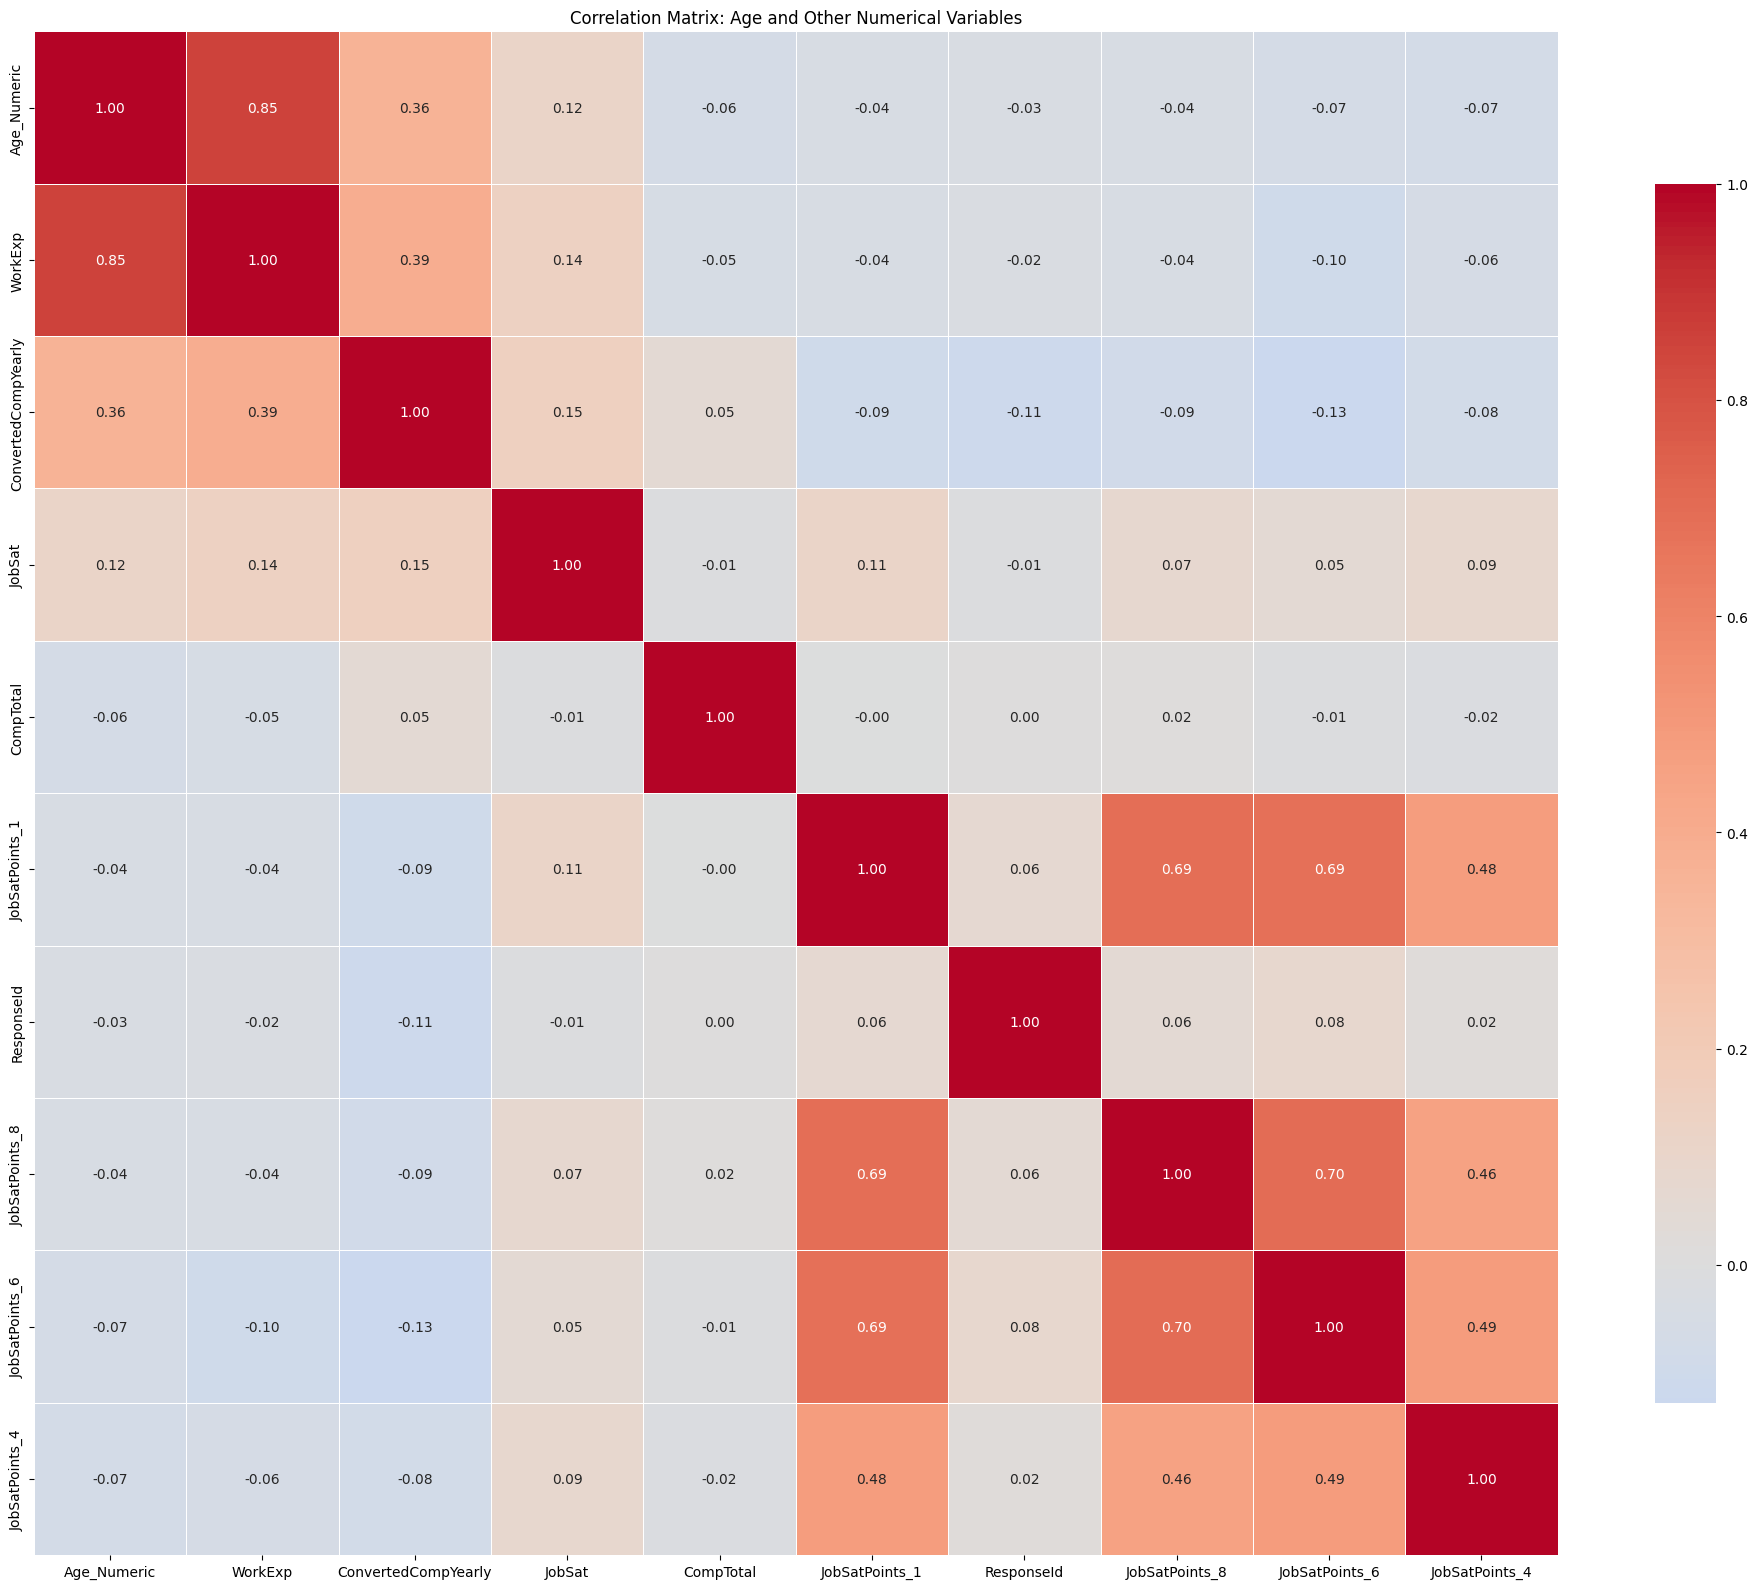

Correlations with Age (Numeric):
Age_Numeric            1.000000
WorkExp                0.853541
ConvertedCompYearly    0.362008
JobSat                 0.116562
ResponseId            -0.034115
JobSatPoints_1        -0.037798
JobSatPoints_8        -0.040156
CompTotal             -0.064296
JobSatPoints_6        -0.065038
JobSatPoints_4        -0.072575
Name: Age_Numeric, dtype: float64


In [65]:
# Age transformation and correlation analysis
if 'Age' in filtered_df.columns:
    # Map Age to numeric values
    age_mapping = {
        '25-34 years old': 30,
        '35-44 years old': 40,
        '18-24 years old': 21,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 65,
        'Prefer not to say': np.nan,
        'Under 18 years old': 17
    }
    
    filtered_df['Age_Numeric'] = filtered_df['Age'].map(age_mapping)
    
    # Select numeric columns for correlation
    numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Create correlation matrix
    if 'Age_Numeric' in numeric_cols:
        corr_cols = ["Age_Numeric","WorkExp","ConvertedCompYearly","JobSat","CompTotal","JobSatPoints_1","ResponseId","JobSatPoints_8","JobSatPoints_6","JobSatPoints_4"]
        correlation_matrix = filtered_df[corr_cols].corr()
        
        # Visualize correlation matrix
        plt.figure(figsize=(20, 16))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                   center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Matrix: Age and Other Numerical Variables')
        plt.tight_layout()
        plt.show()
        
        # Show correlations with Age_Numeric
        print("Correlations with Age (Numeric):")
        age_correlations = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
        print(age_correlations.head(10))
    else:
        print("Age_Numeric column not created")
else:
    print("Age column not found in dataset")


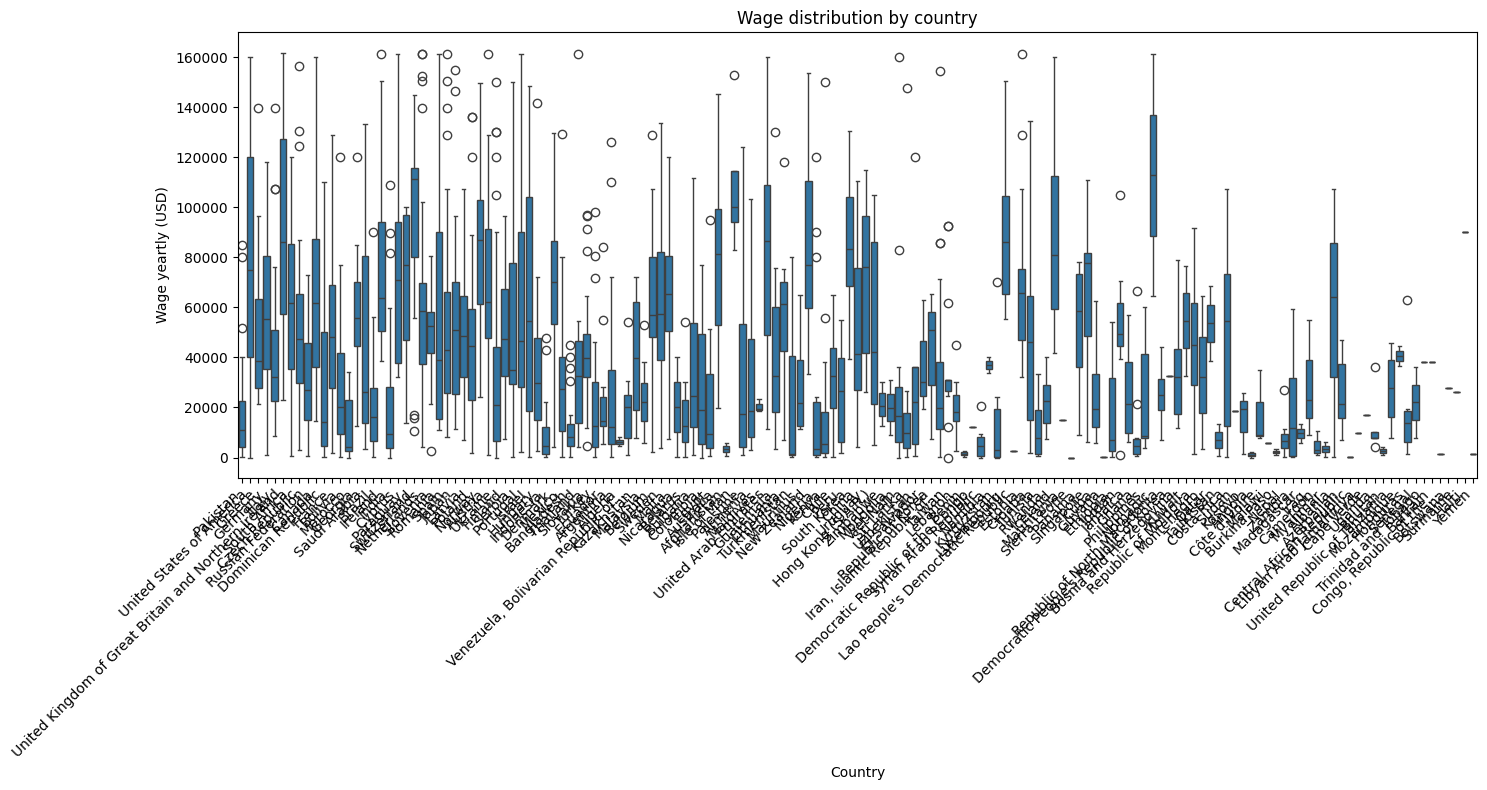

In [66]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=filtered_df)
plt.title('Wage distribution by country')
plt.xlabel('Country')
plt.ylabel('Wage yeartly (USD)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [67]:
# To see outliers in a certain country
country1 = 'United States of America' 
outlier_values = filtered_df[(filtered_df['Country'] == country1) & (filtered_df['ConvertedCompYearly'] > filtered_df[filtered_df['Country'] == country1]['ConvertedCompYearly'].quantile(0.95))]
print(f"{country1} outlier values:")
print(outlier_values['ConvertedCompYearly'])

United States of America outlier values:
549      160000.0
25152    160000.0
Name: ConvertedCompYearly, dtype: float64


In [68]:
countries=['United States of America','Germany','United Kingdom of Great Britain and Northern Ireland']
data_country=filtered_df[filtered_df['Country'].isin(countries)]
data_country['Country'].value_counts()

Country
United States of America                                81
Germany                                                 61
United Kingdom of Great Britain and Northern Ireland    30
Name: count, dtype: int64

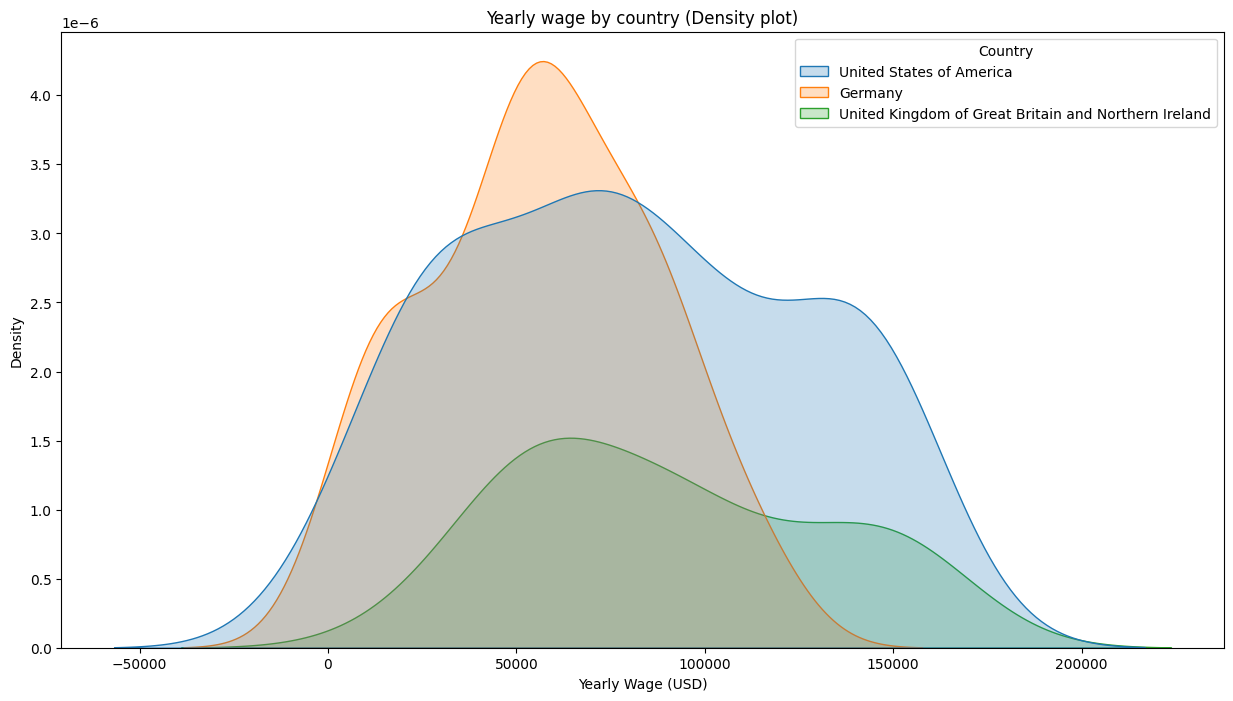

In [69]:
filtered_df['Country'] = filtered_df['Country'].astype('category')
plt.figure(figsize=(15, 8))
sns.kdeplot(data=data_country, x='ConvertedCompYearly', hue='Country',fill=True)
plt.title('Yearly wage by country (Density plot)')
plt.xlabel('Yearly Wage (USD)')
plt.ylabel('Density')
plt.show()

In [70]:
#Removing Outliers with z-sore
from scipy import stats
# calculate z-score
df["Z_Score"] = np.abs(stats.zscore(df["ConvertedCompYearly"]))

# determine threshold (generally 3)
threshold = 3

# not outlier
df_cleaned_2 = df[df["Z_Score"] < threshold].drop(columns=["Z_Score"])  # drop Z-Score 
# Results
print(len(df))
print(len(df_cleaned_2))

2016
2012


In [71]:
# Removing outliers with upper and bottom boundries
lower_percentile = df["ConvertedCompYearly"].quantile(0.01)
upper_percentile = df["ConvertedCompYearly"].quantile(0.99)

# clean data out of that boundries
df_cleaned_3 = df[(df["ConvertedCompYearly"] >= lower_percentile) & (df["ConvertedCompYearly"] <= upper_percentile)]

#Results
print(len(df))
print(len(df_cleaned_3))

2016
1975


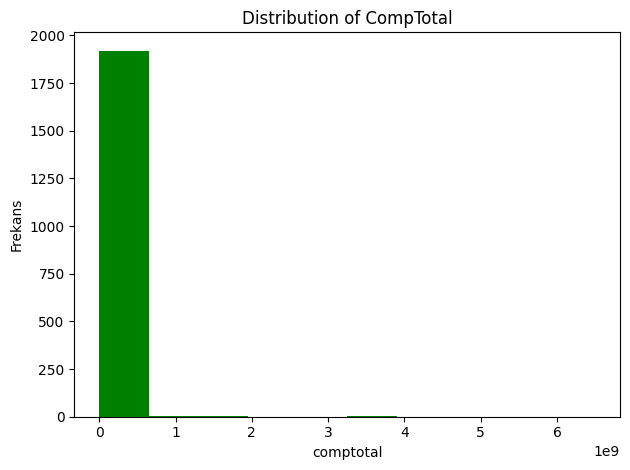

In [72]:
#Data visualization
#Visualizing distrubution of data
plt.hist(filtered_df["CompTotal"].dropna(),bins=10,histtype='bar', facecolor='g')
plt.title('Distribution of CompTotal')
plt.xlabel('comptotal')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old'),
  Text(7, 0, 'Prefer not to say')])

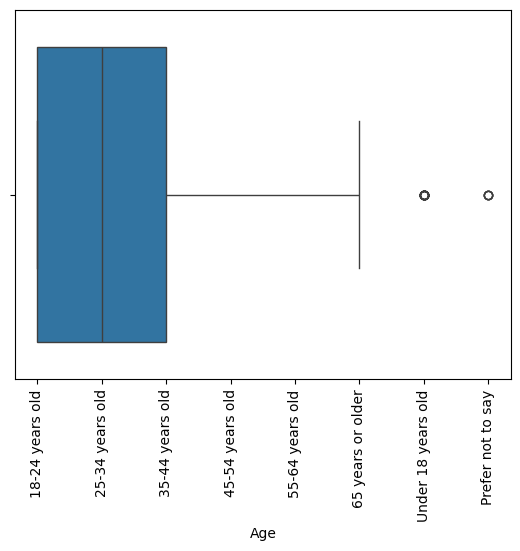

In [73]:
#Boxplot of age
sns.boxplot(x='Age', data=filtered_df,orient="h")
plt.xticks(rotation=90)

Text(0, 0.5, 'Work Experience')

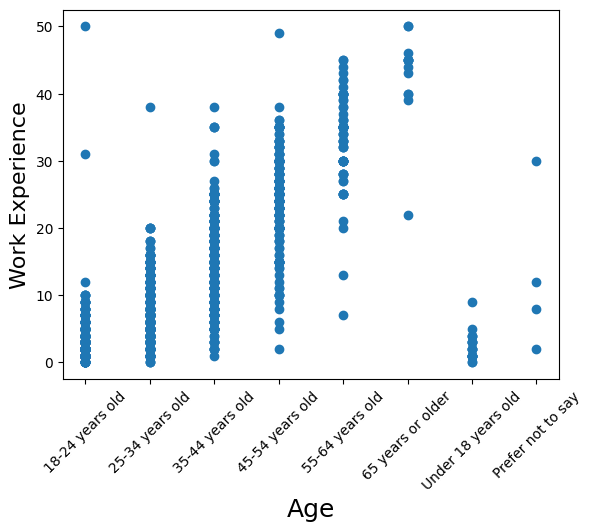

In [74]:
#Visualizing relationships in data
#scatter plot of Age and WorkExp.
plt.scatter(x=filtered_df["Age"],y=filtered_df["WorkExp"])
plt.xticks(rotation=45)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Work Experience', fontsize=16)

In [75]:
#bubble plot of TimeSearching and Frustration using the Age column as the bubble size.


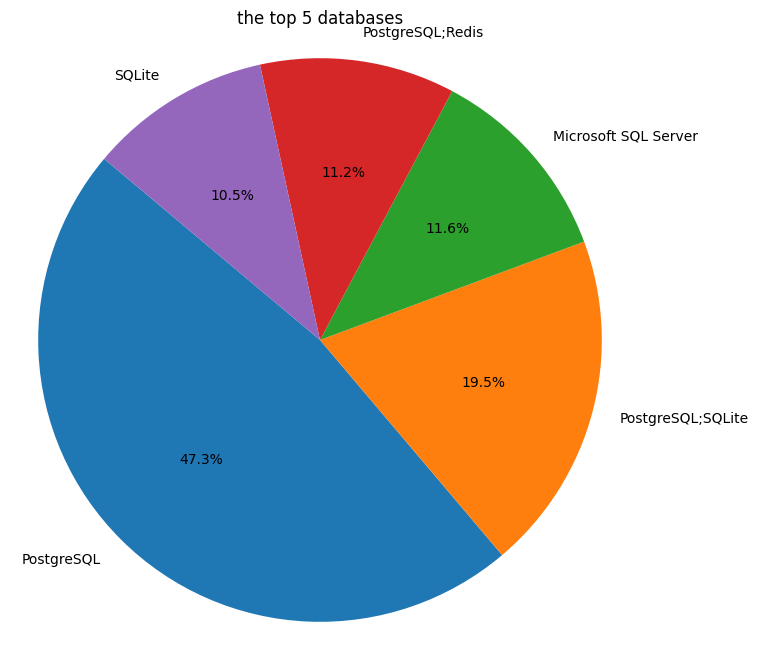

In [79]:
#Visualizing Composition of Data
database=filtered_df['DatabaseWantToWorkWith'].value_counts().head()
plt.figure(figsize=(8, 8))
plt.pie(database, labels=database.index, autopct='%1.1f%%', startangle=140)
plt.title('the top 5 databases')
plt.axis('equal')  # circle shape
plt.show()

In [ ]:
map_Time={"30-60 minutes a day":45,"15-30 minutes a day":23,"60-120 minutes a day":90,"Less than 15 minutes a day":15,"Over 120 minutes a day":120}
filtered_df['TimeSearching_Num']=filtered_df['TimeSearching'].map(map_Time)
filtered_df['TimeAnswering_Num']=filtyered_df['TimeAnswering'].map(map_Time)
#Stacked Charts

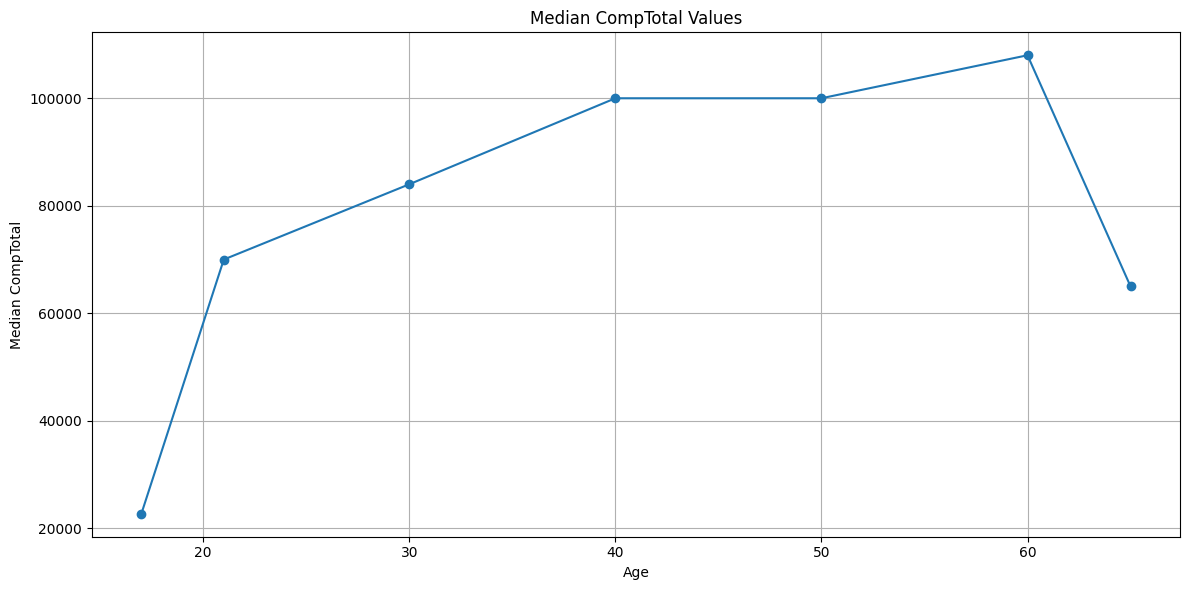

In [85]:
#Visualizing comparison of data
#Line chart
median_values = filtered_df.groupby('Age_Numeric')['CompTotal'].median()
plt.figure(figsize=(12, 6))
median_values.plot(kind='line', marker='o')
plt.title('Median CompTotal Values')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True) 
plt.tight_layout()
plt.show()

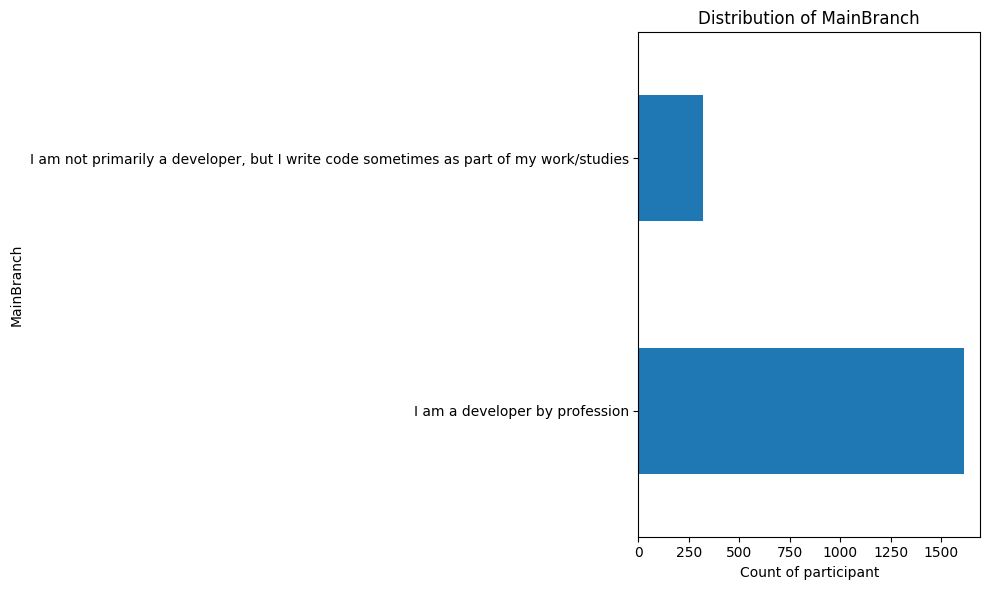

In [87]:
main_branch_counts = filtered_df['MainBranch'].value_counts()
#horizontal bar chart using the MainBranch column.
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.title('Distribution of MainBranch')
plt.xlabel('Count of participant')
plt.ylabel('MainBranch')
plt.tight_layout()
plt.show()